In [1]:
import pandas as pd
from google.colab import drive

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/ML_Things/creditcard.csv'

In [5]:
df = pd.read_csv(file_path)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe(include="all").T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [11]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1081)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

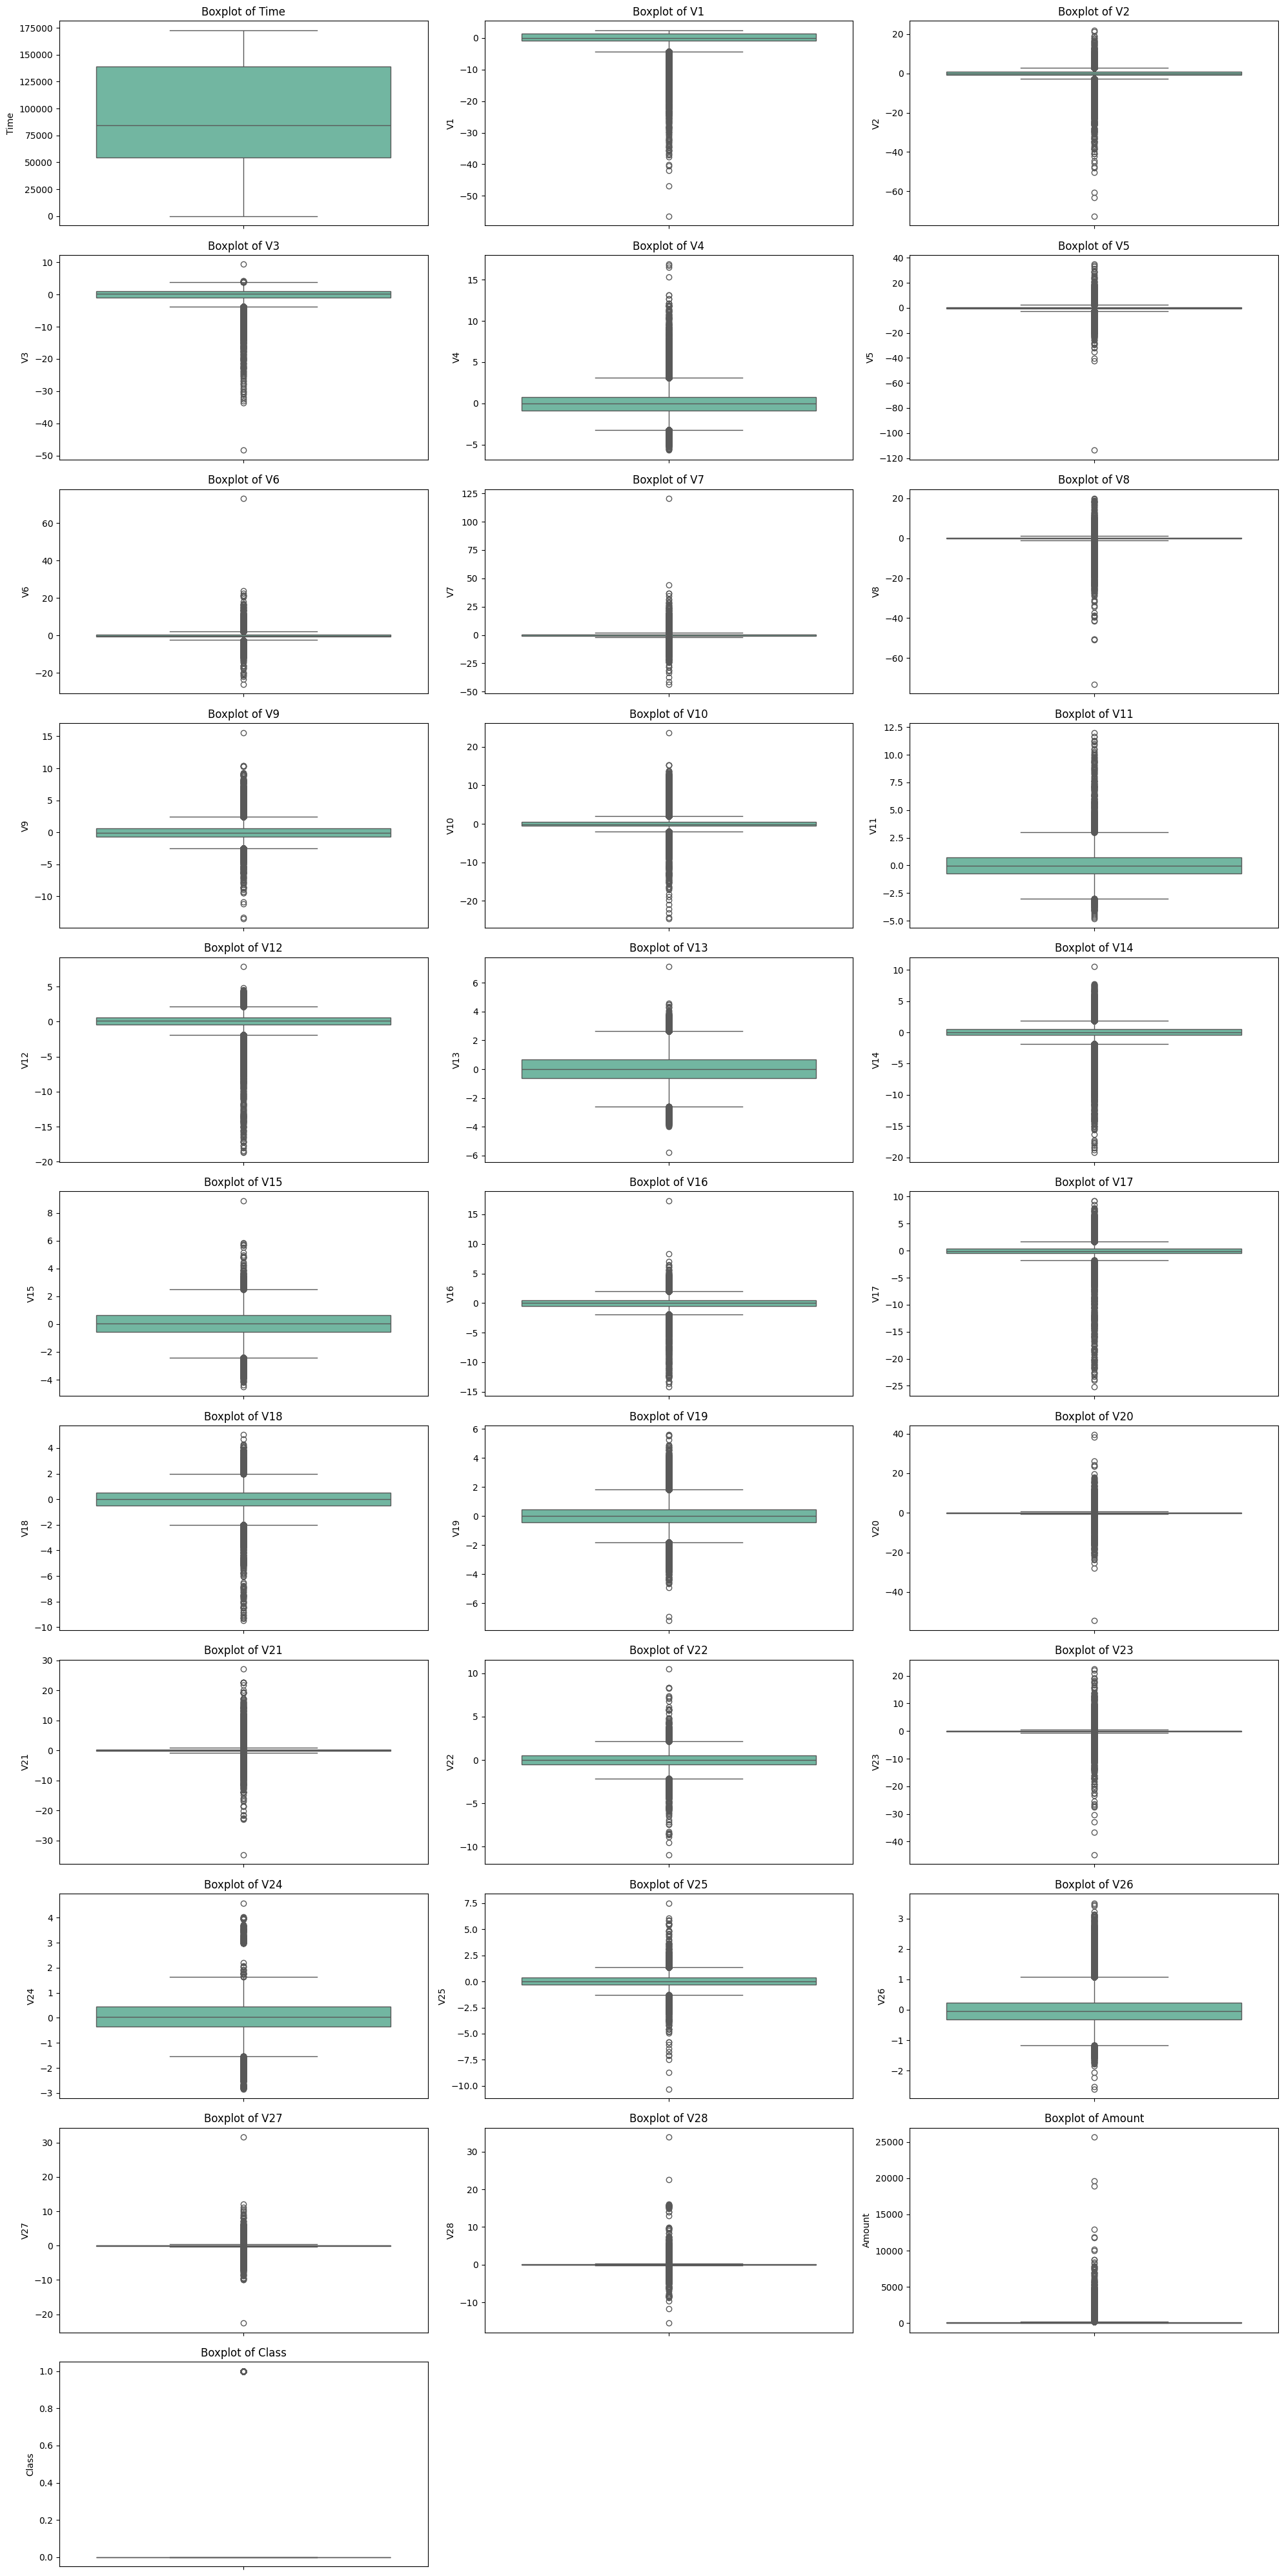

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 40))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(data=df, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

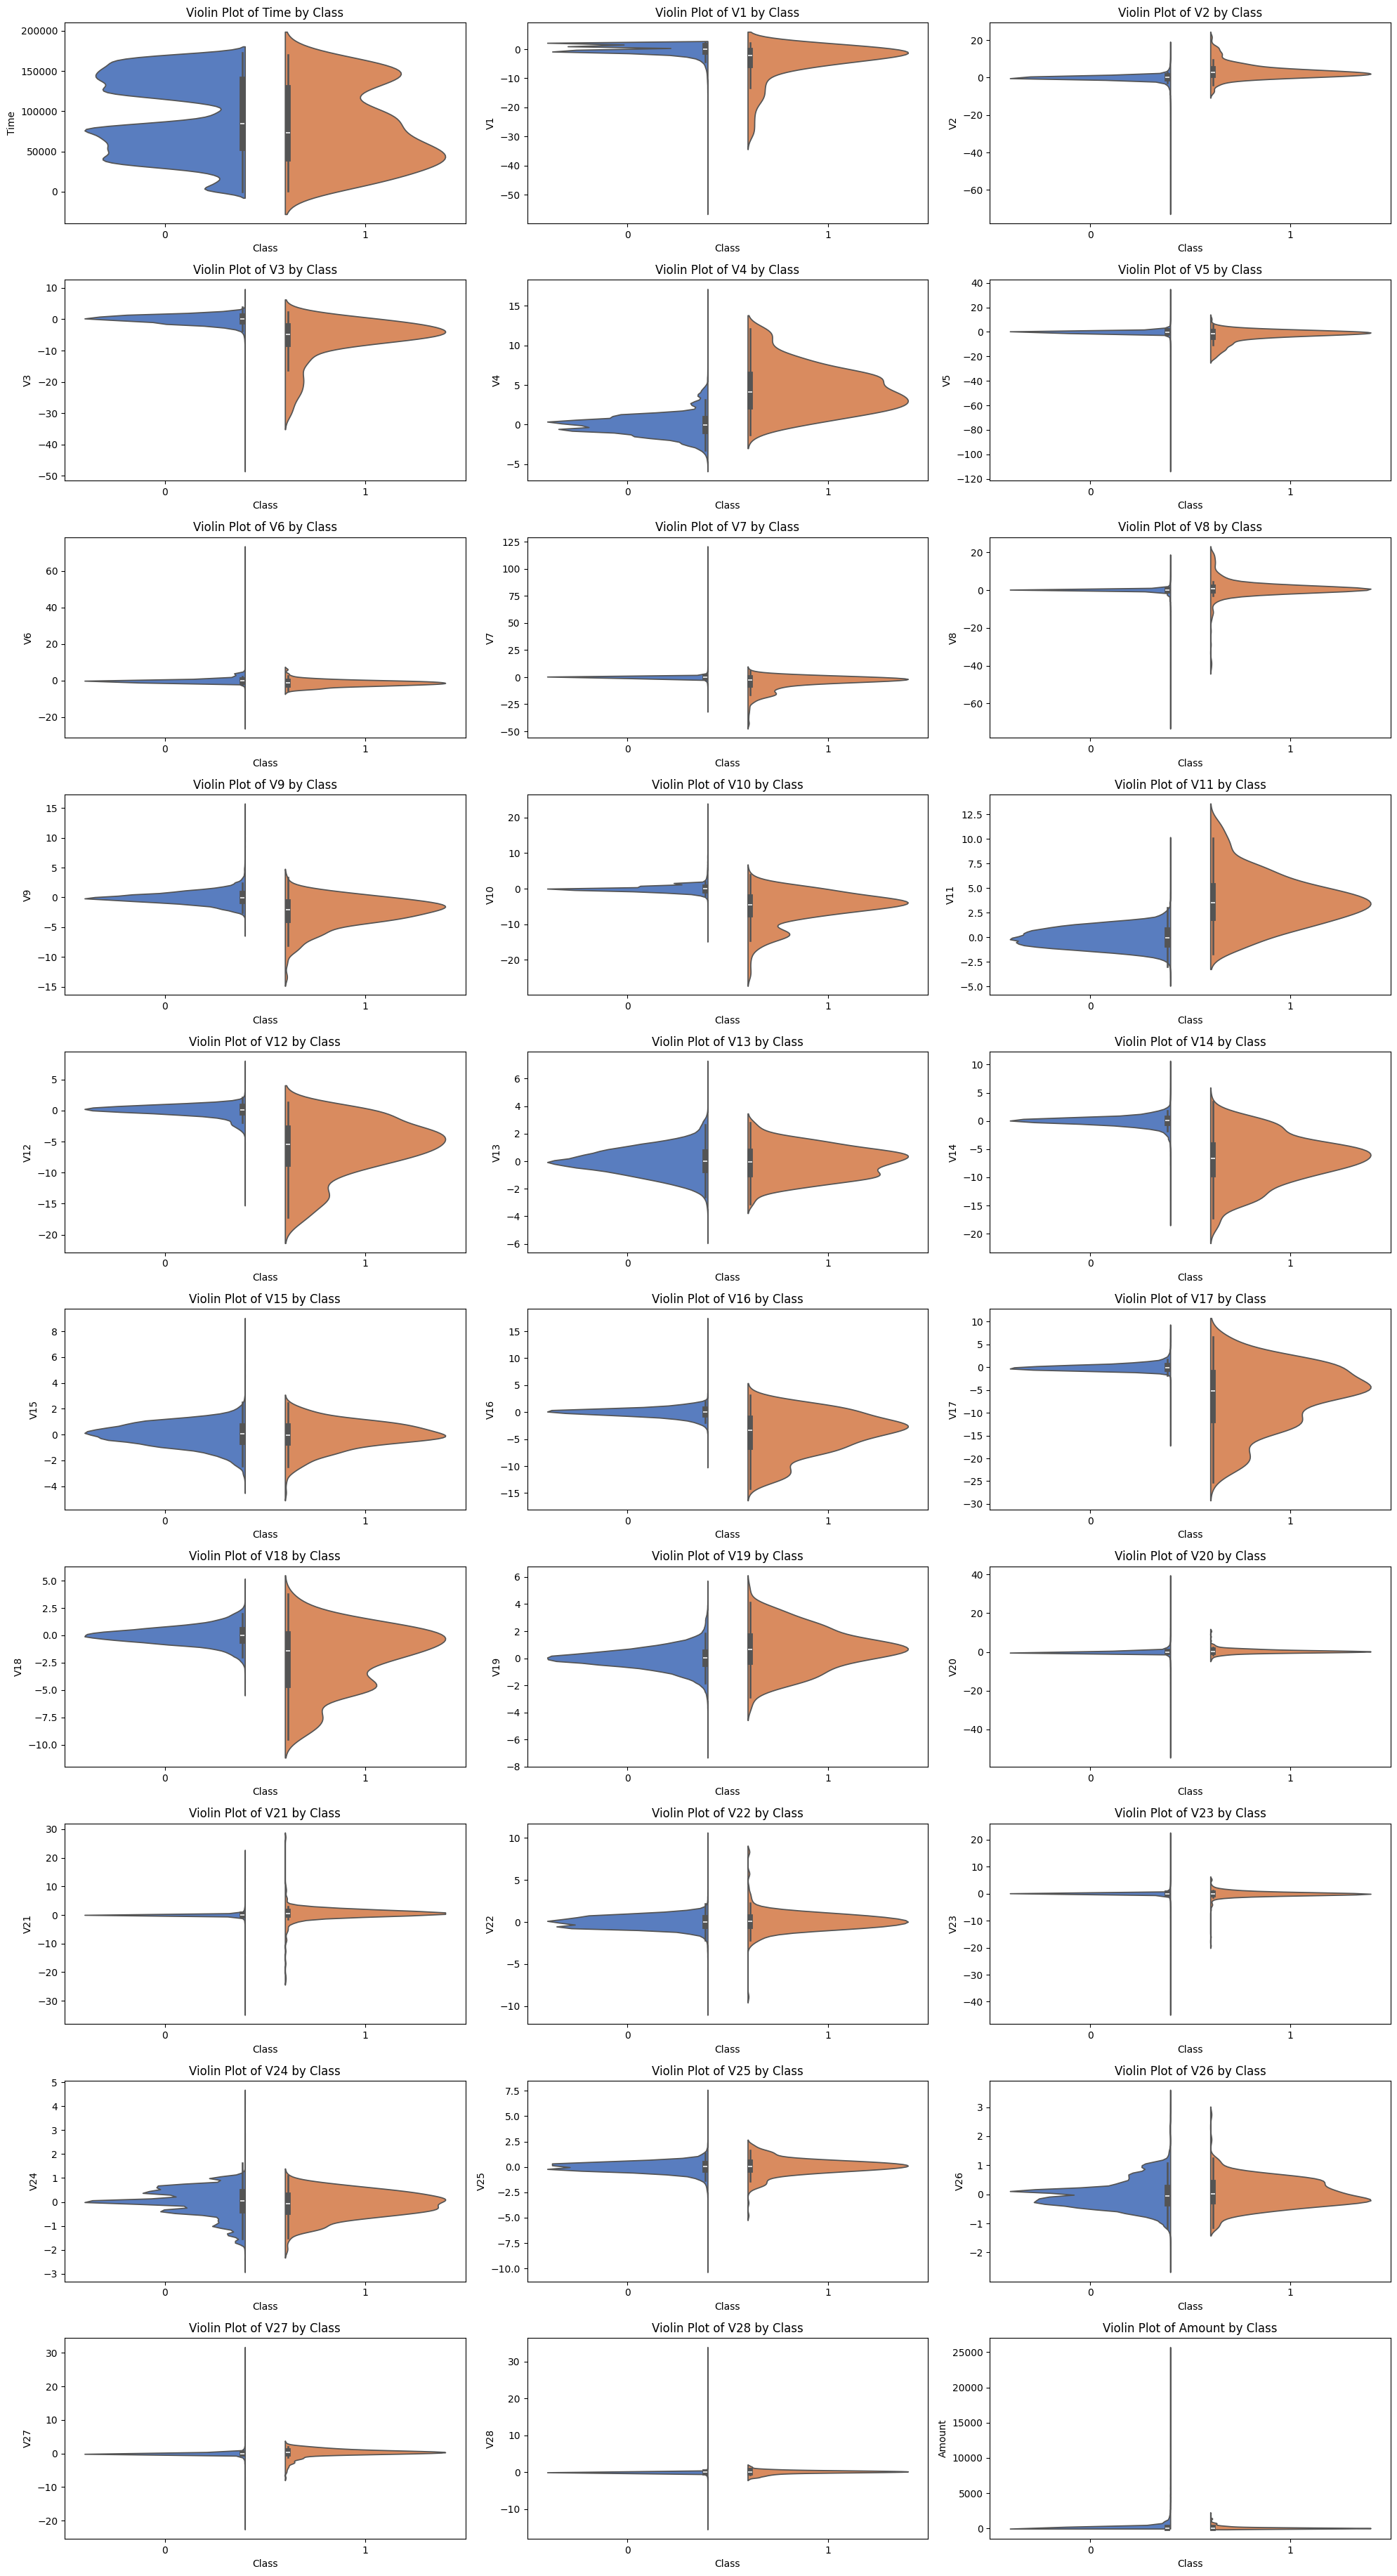

In [16]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(numeric_cols, 1):
    if col != "Class":
        plt.subplot(len(numeric_cols)//3 + 1, 3, i)
        sns.violinplot(data=df, x="Class", y=col, palette="muted", split=True)
        plt.title(f"Violin Plot of {col} by Class")

plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
df["Time"].describe()


count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

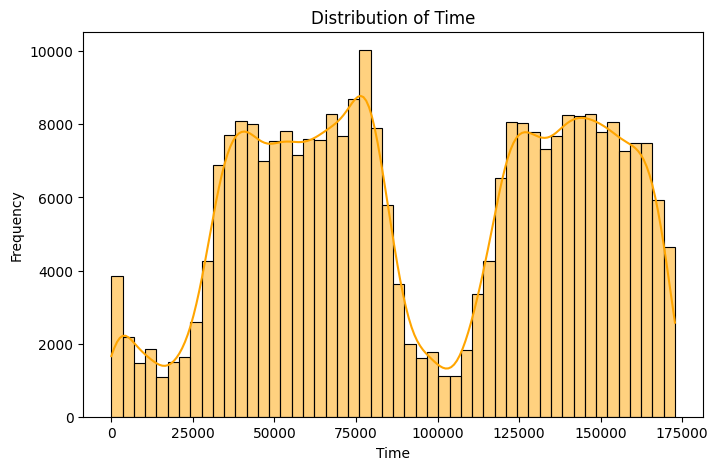

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df["Time"], bins=50, kde=True, color="orange")
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

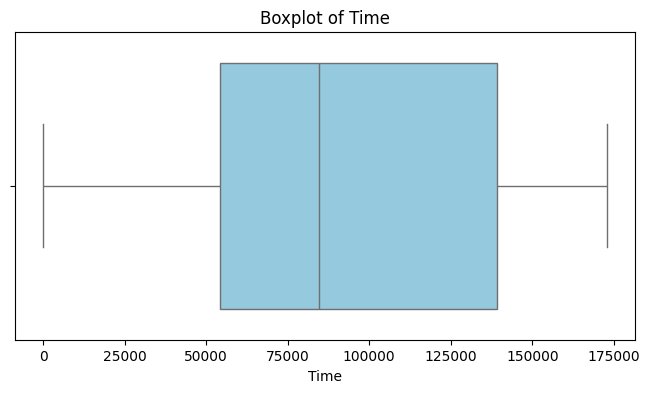

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Time"], color="skyblue")
plt.title("Boxplot of Time")
plt.xlabel("Time")
plt.show()

In [21]:
def analyze_feature(df, column):

    fig, axes = plt.subplots(1, 3, figsize=(18,5))
    sns.histplot(df[column], bins=50, kde=True, ax=axes[0], color="orange")
    axes[0].set_title(f"Distribution of {column}")

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color="skyblue")
    axes[1].set_title(f"Boxplot of {column}")

    # Violinplot
    sns.violinplot(x=df[column], ax=axes[2], color="lightgreen")
    axes[2].set_title(f"Violin Plot of {column}")

    plt.tight_layout()
    plt.show()

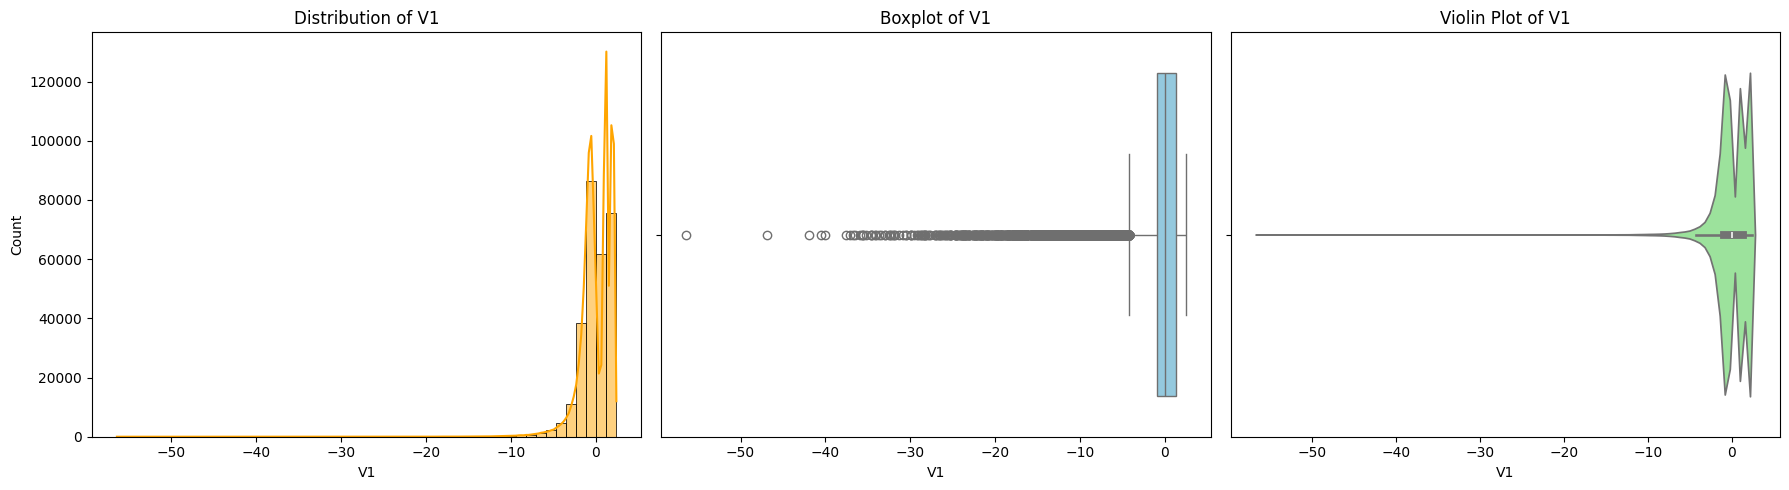

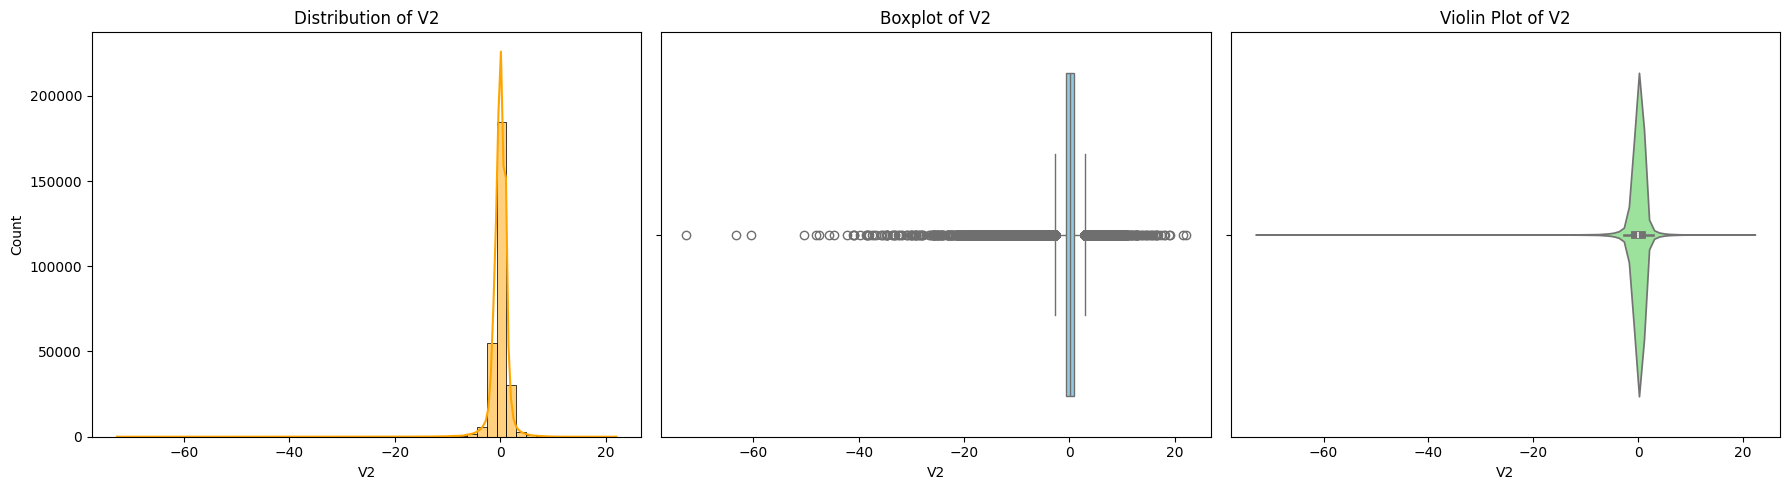

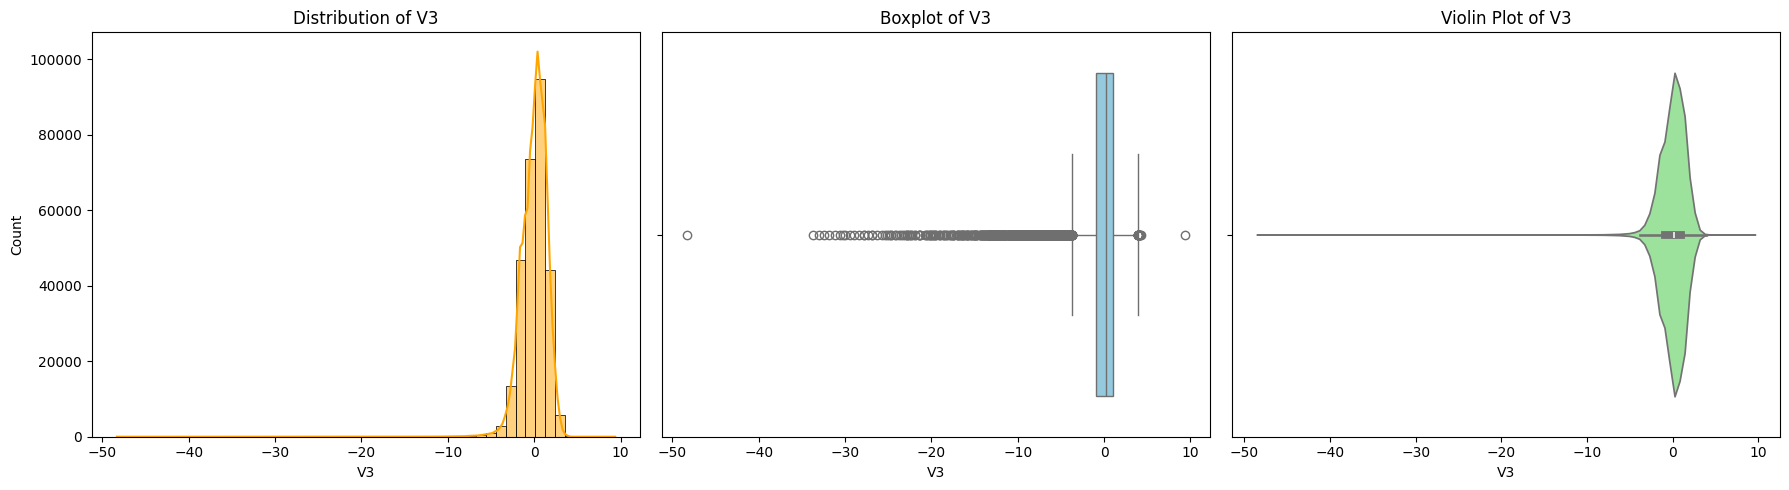

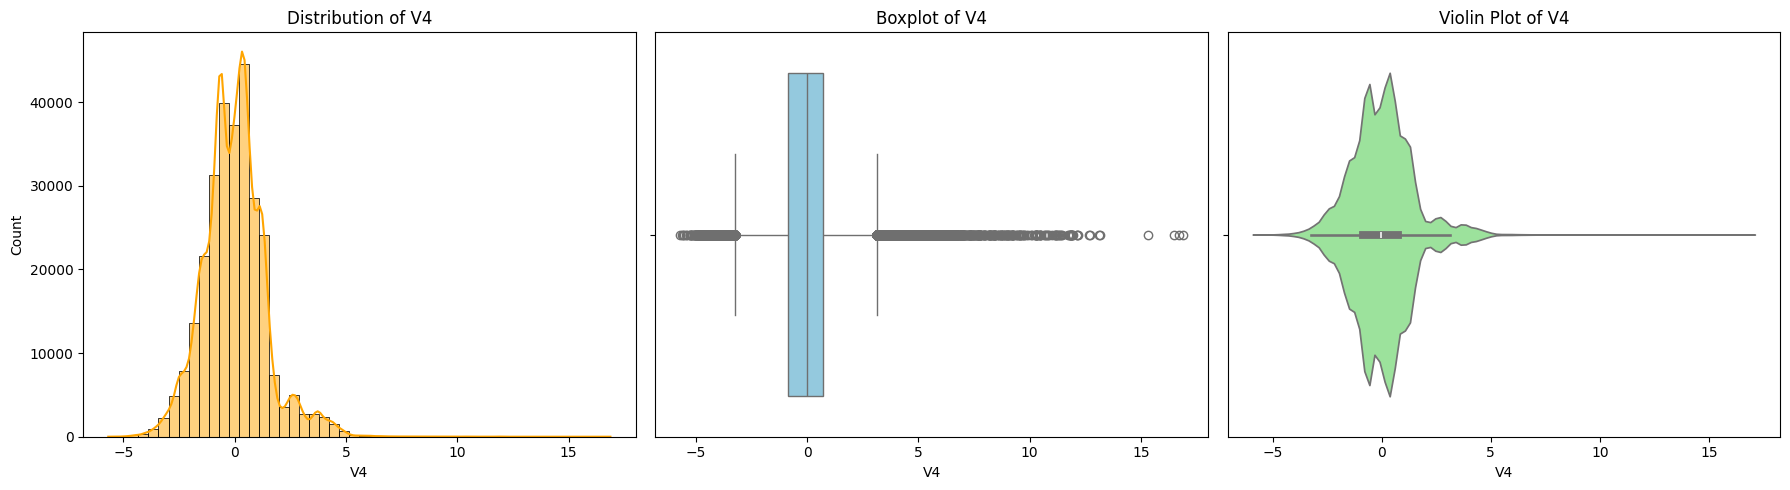

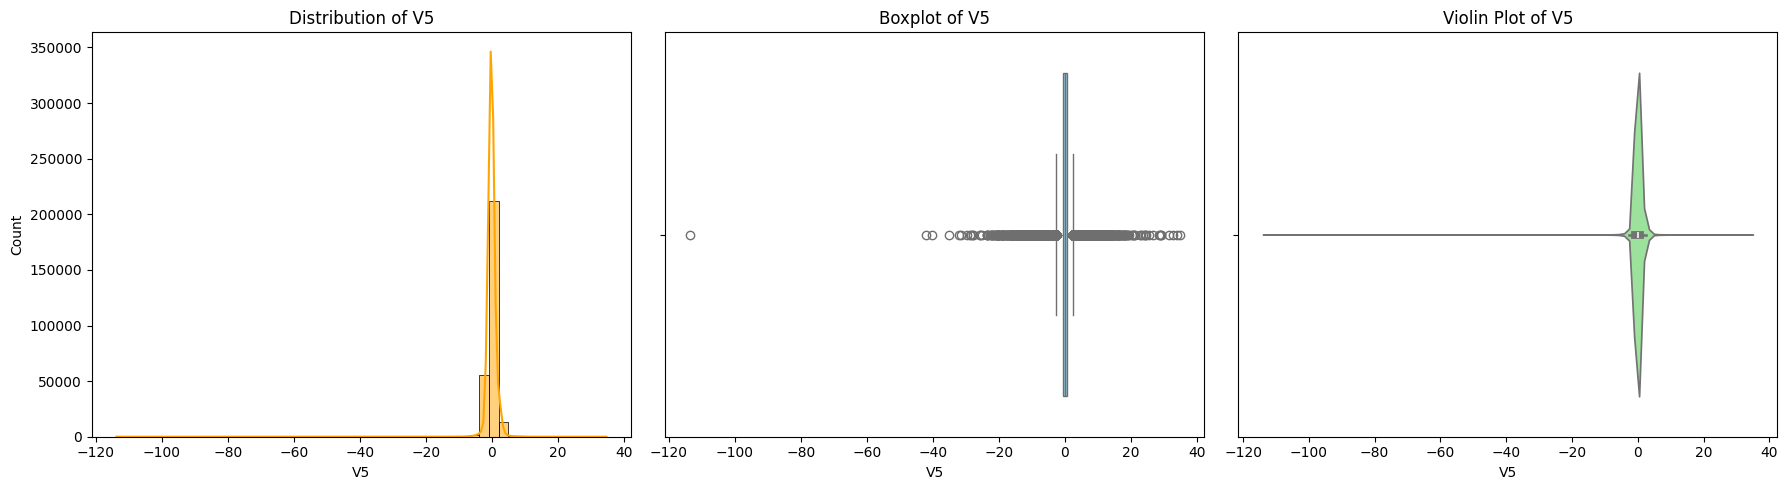

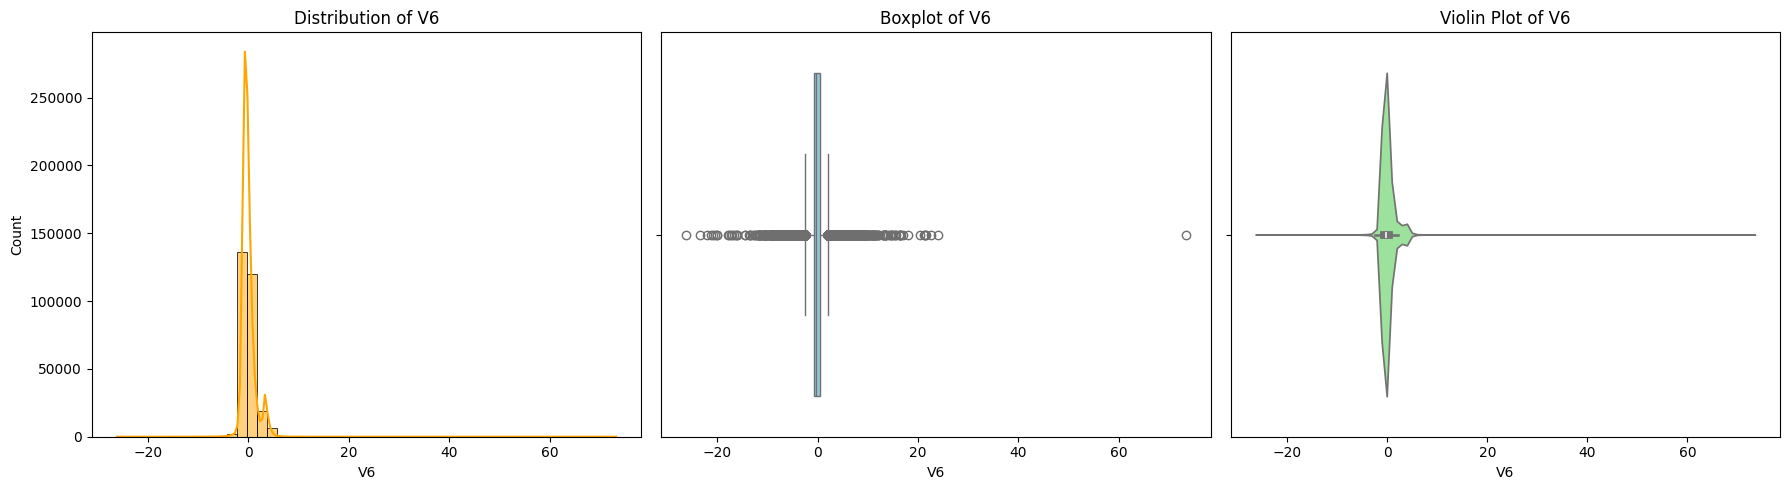

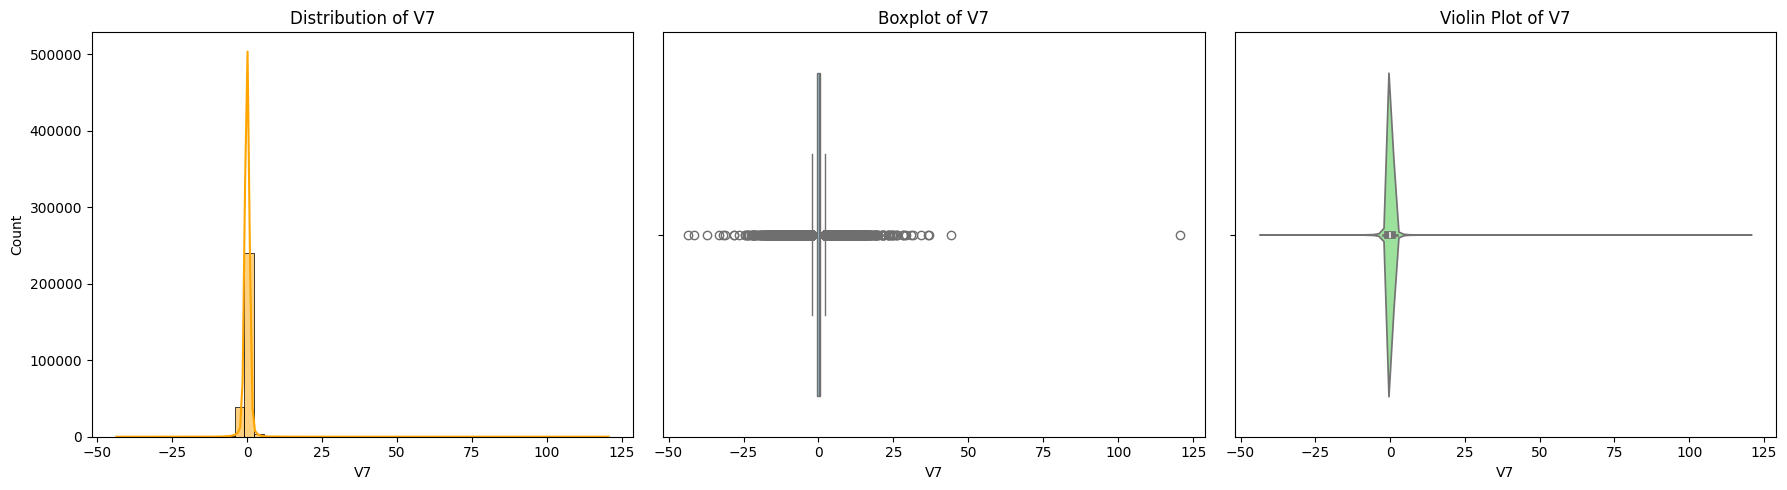

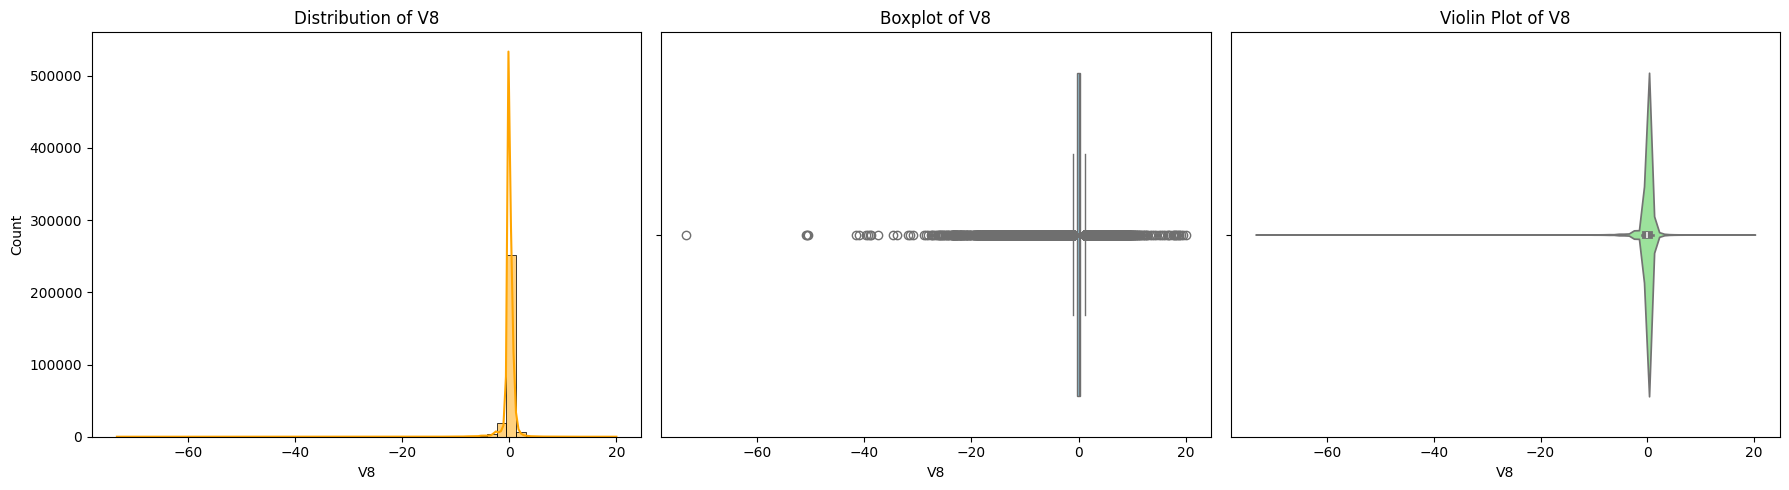

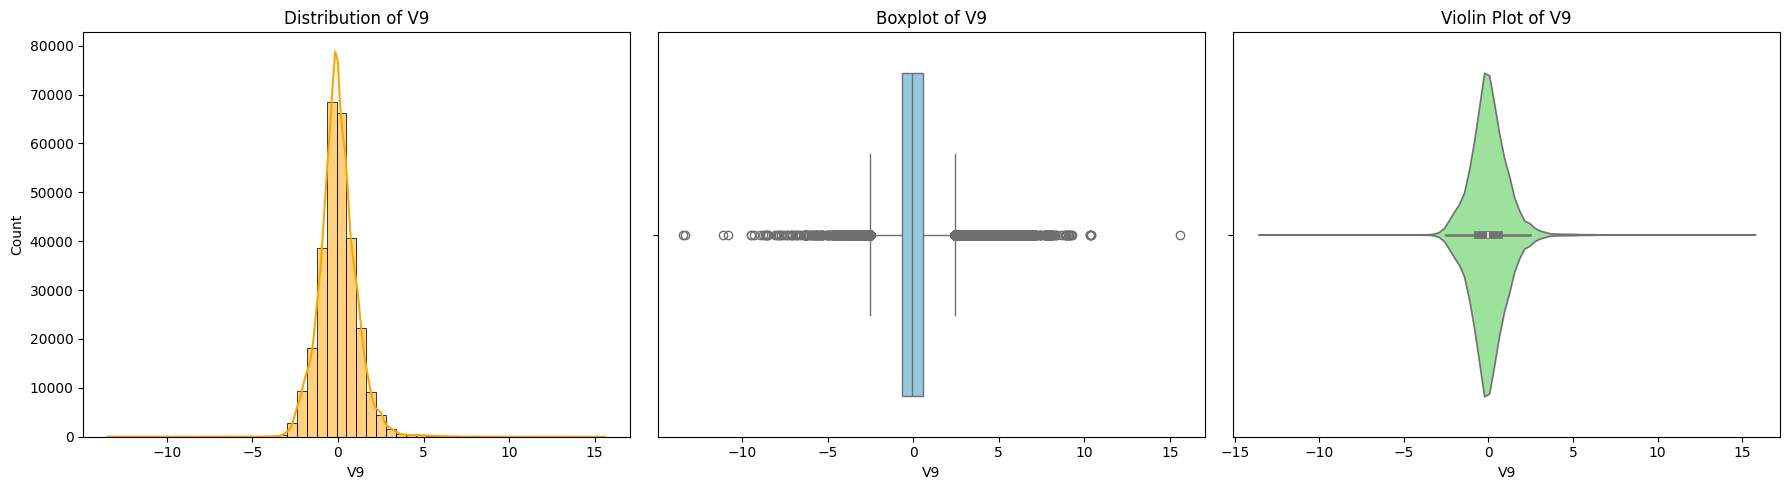

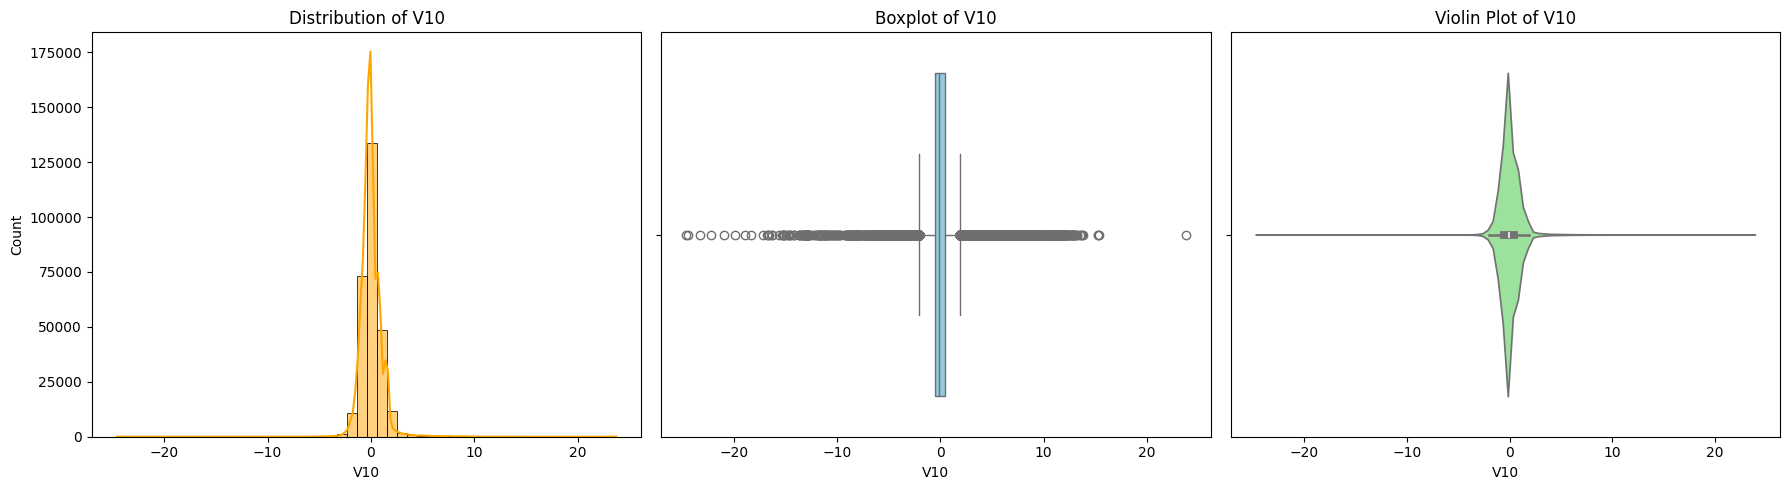

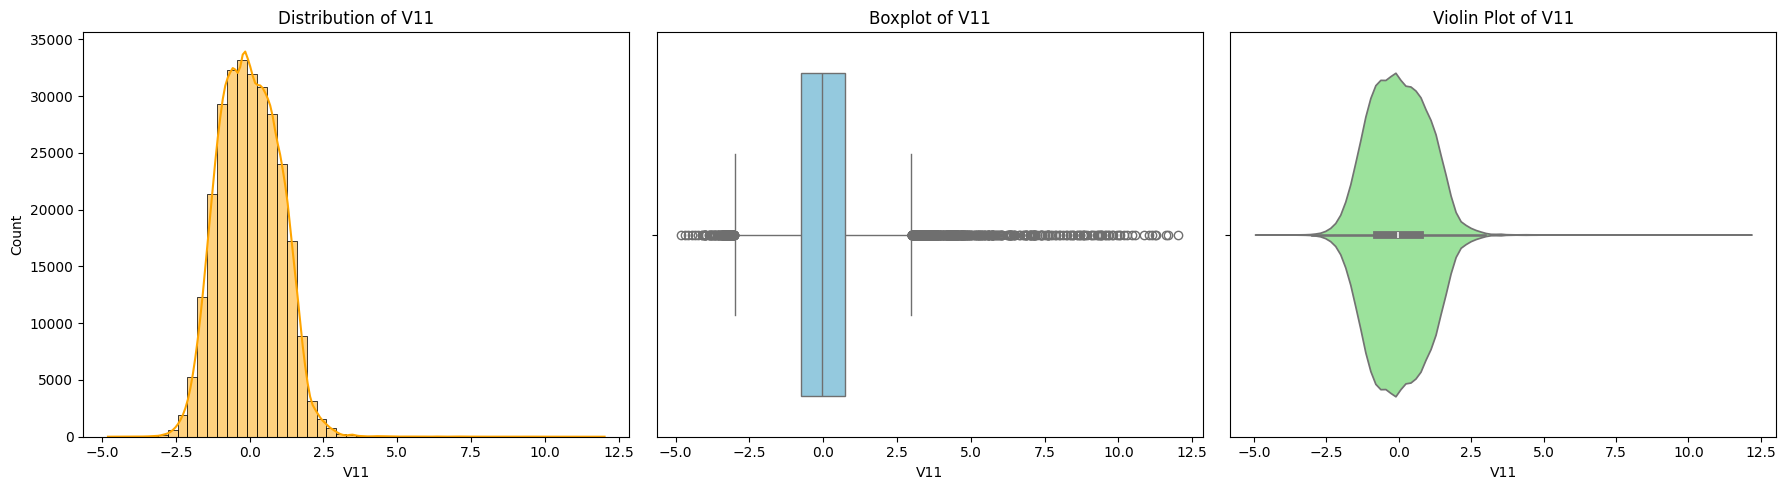

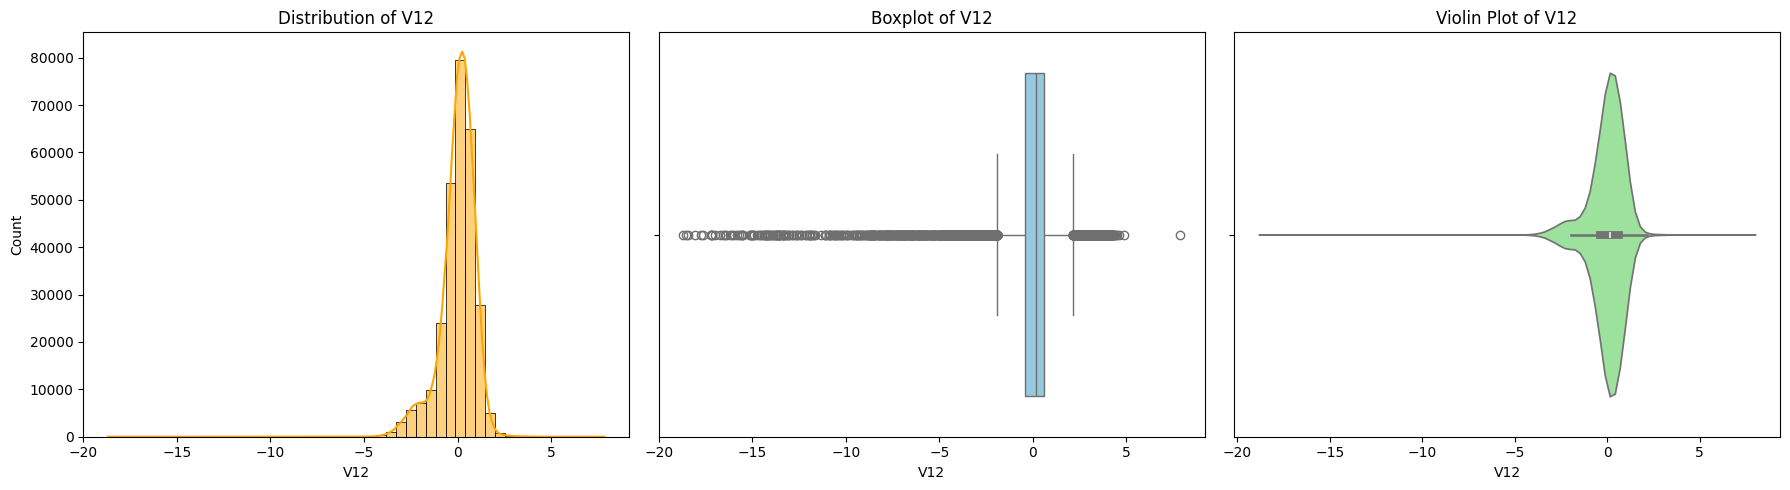

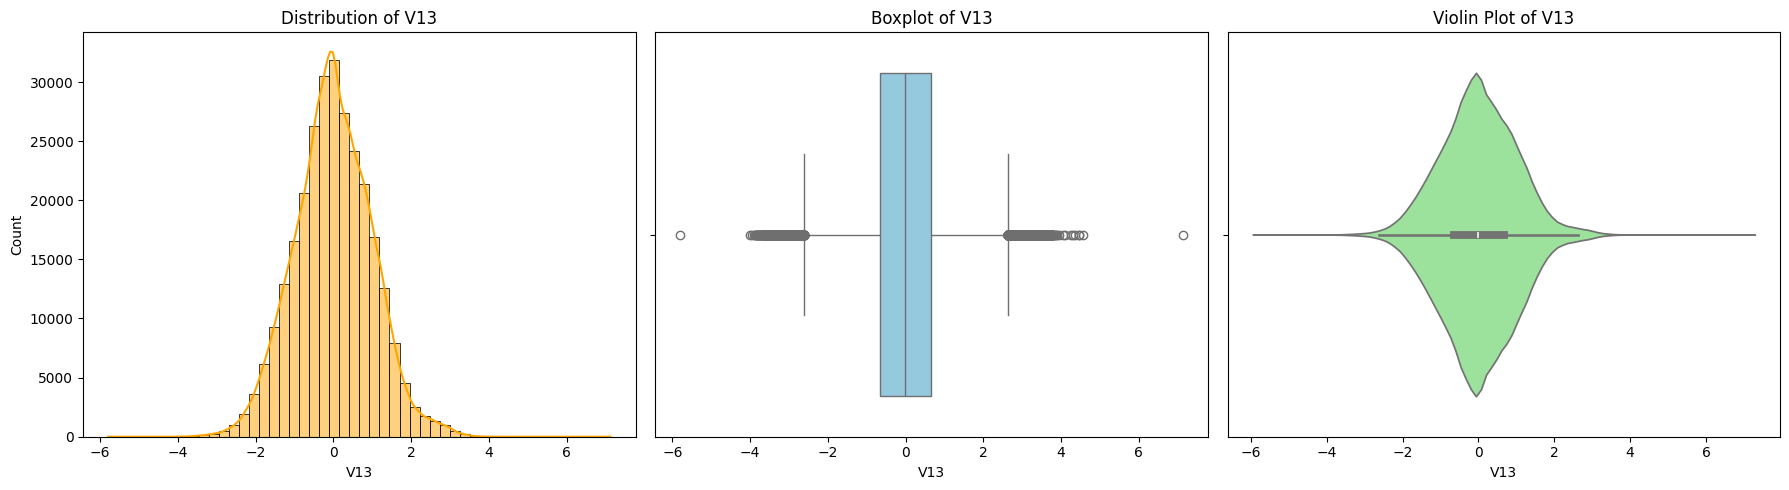

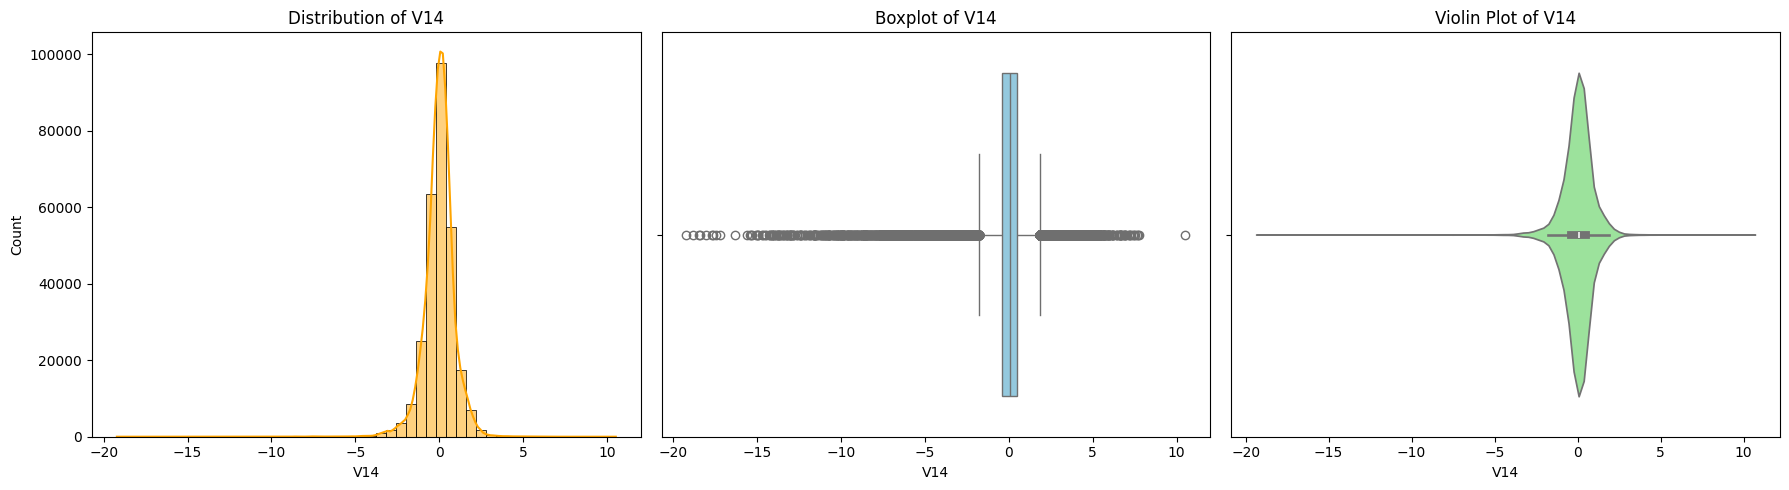

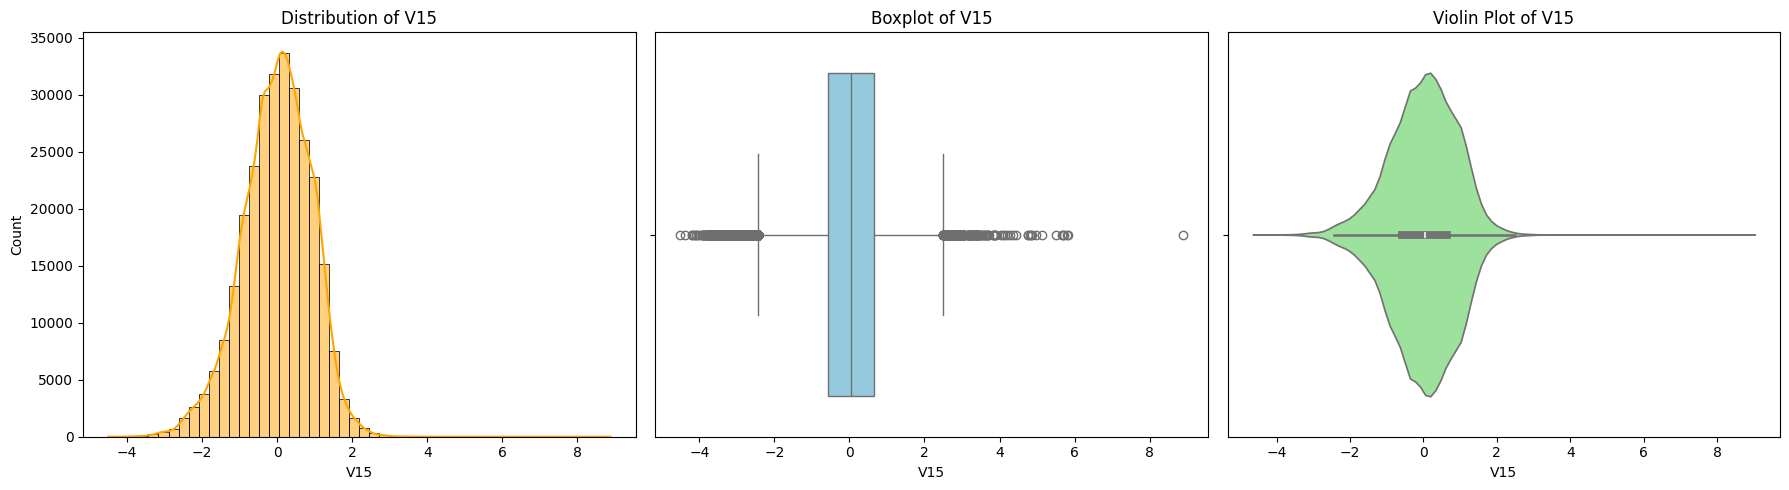

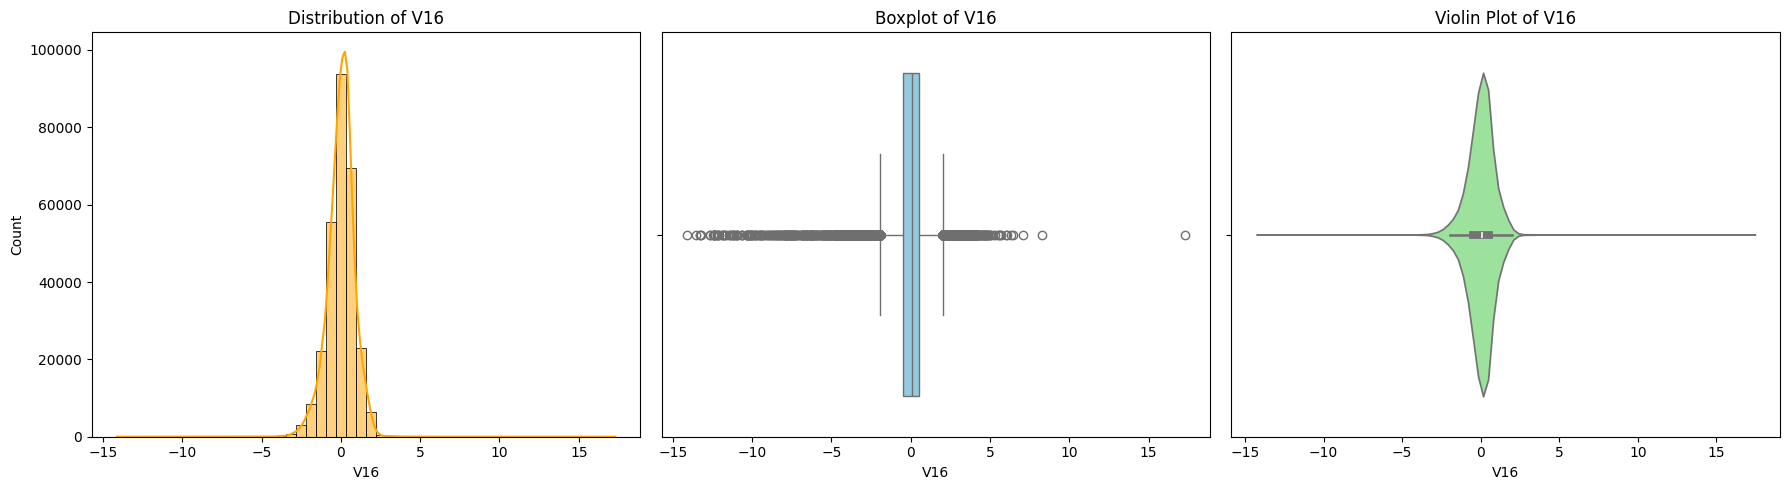

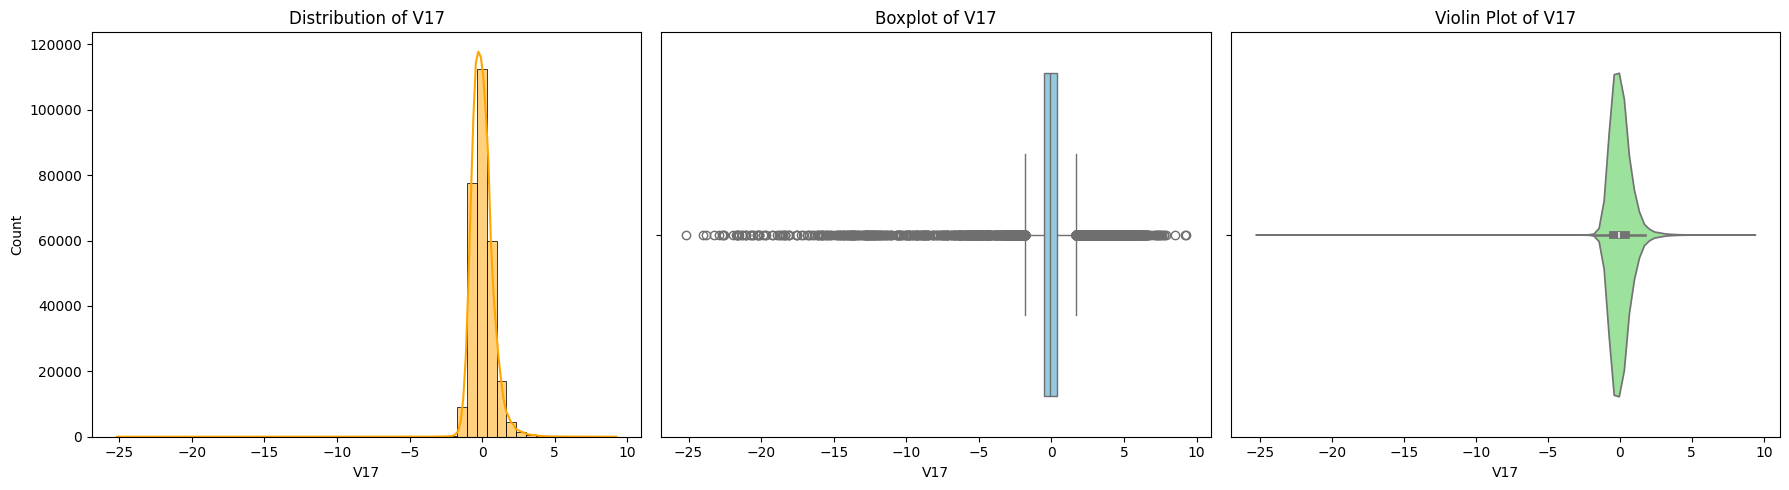

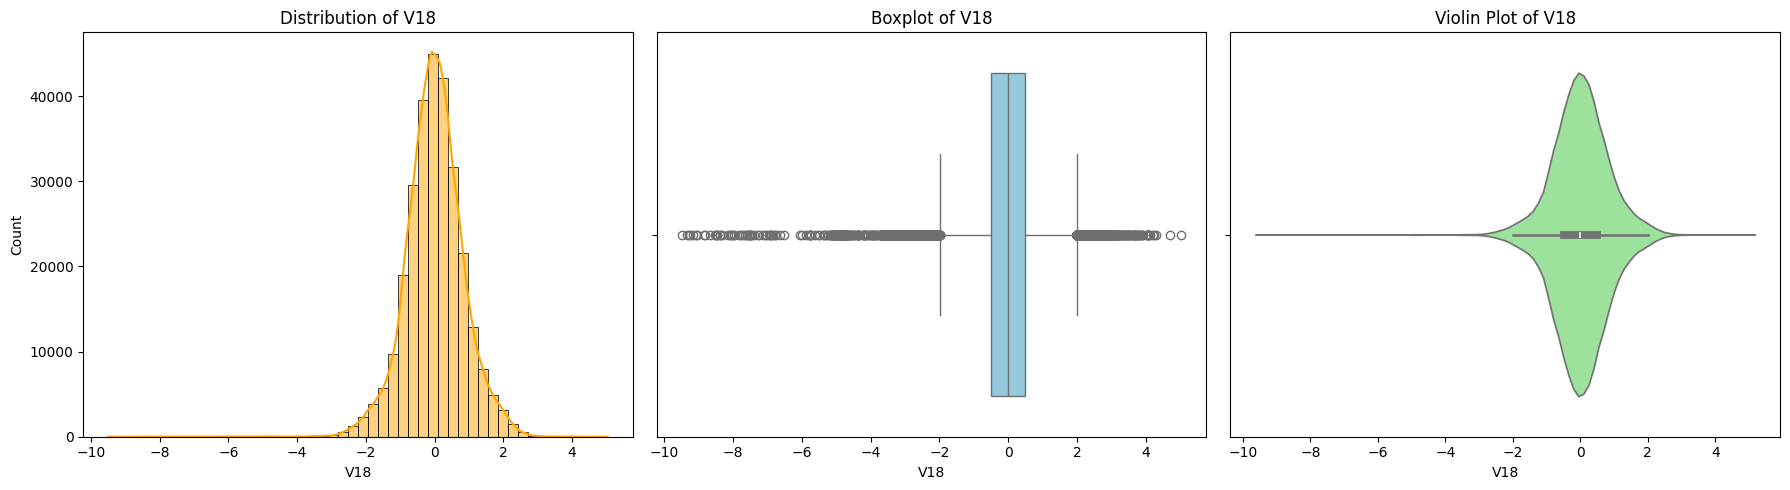

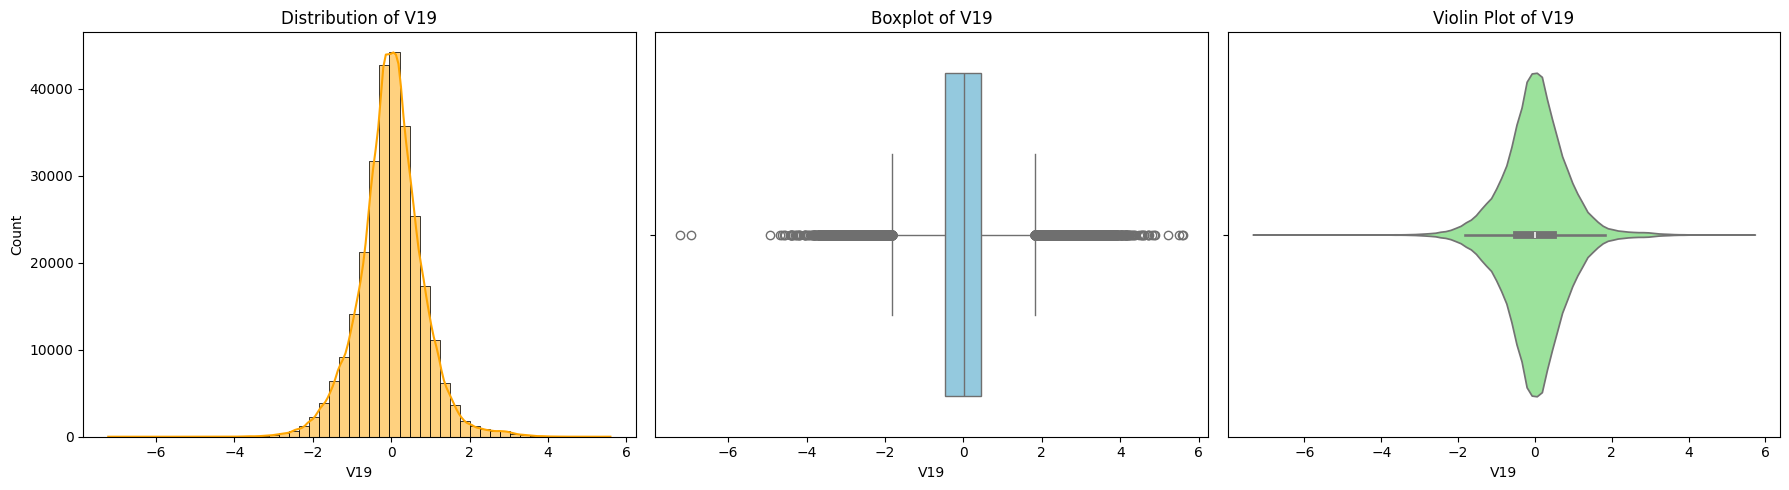

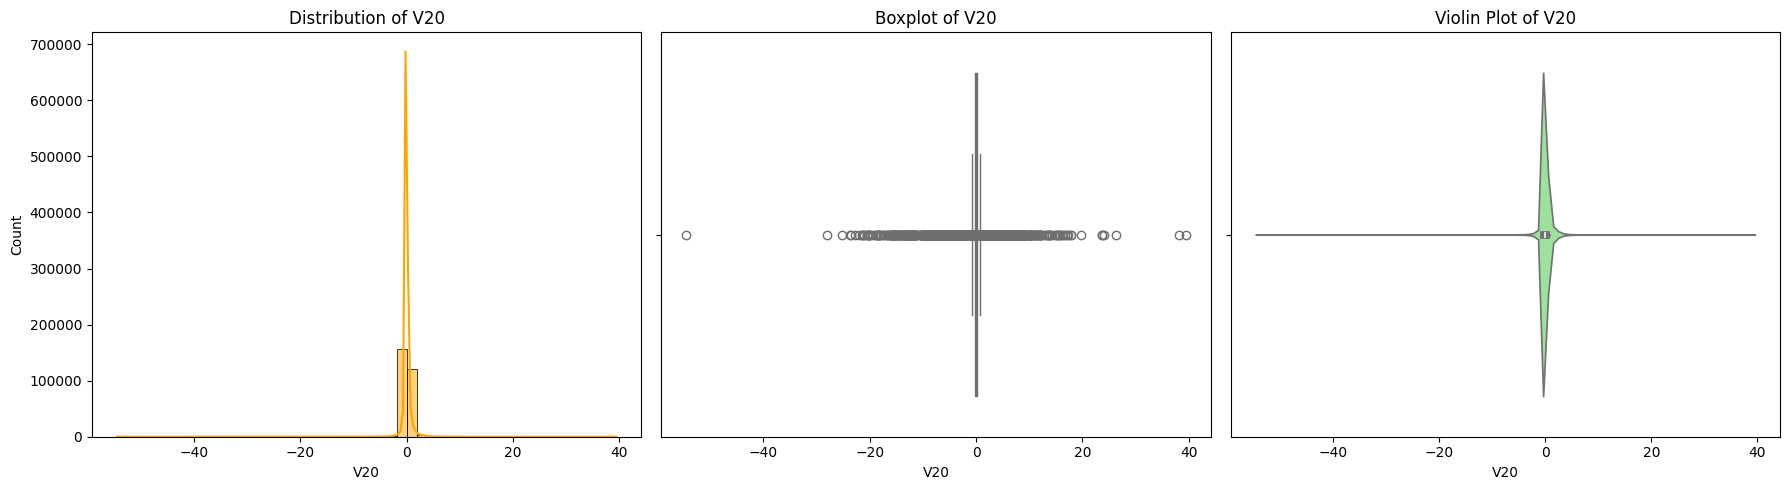

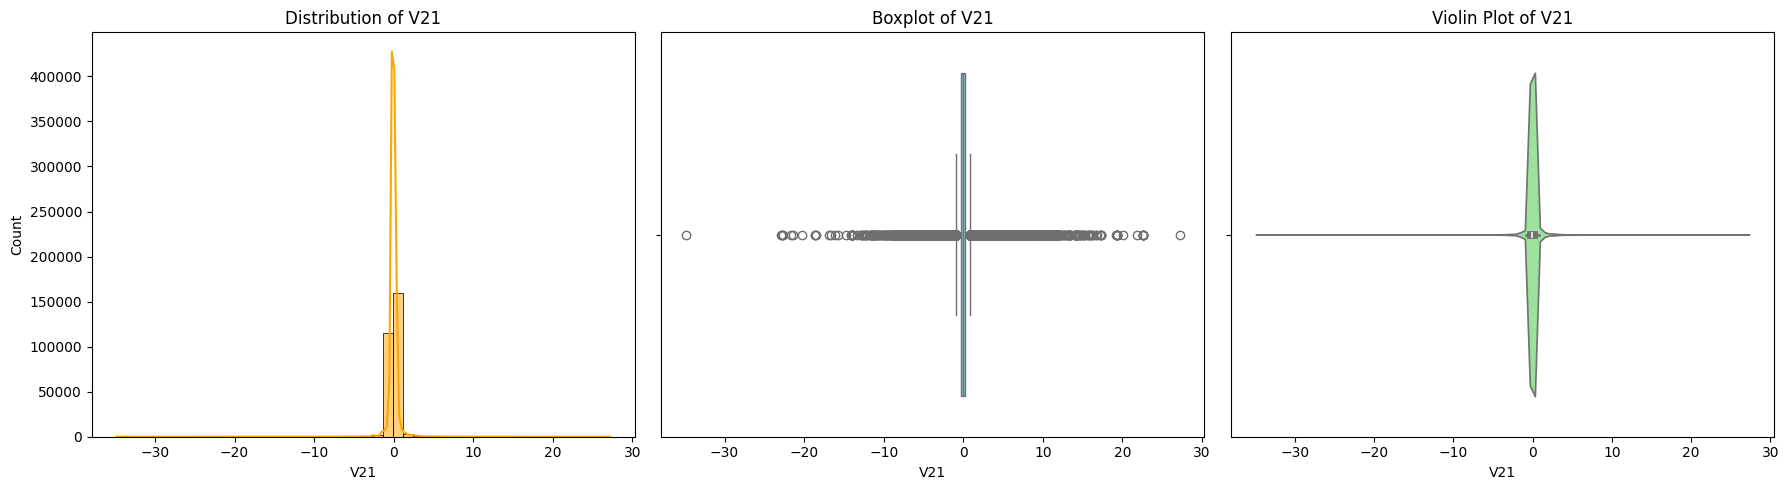

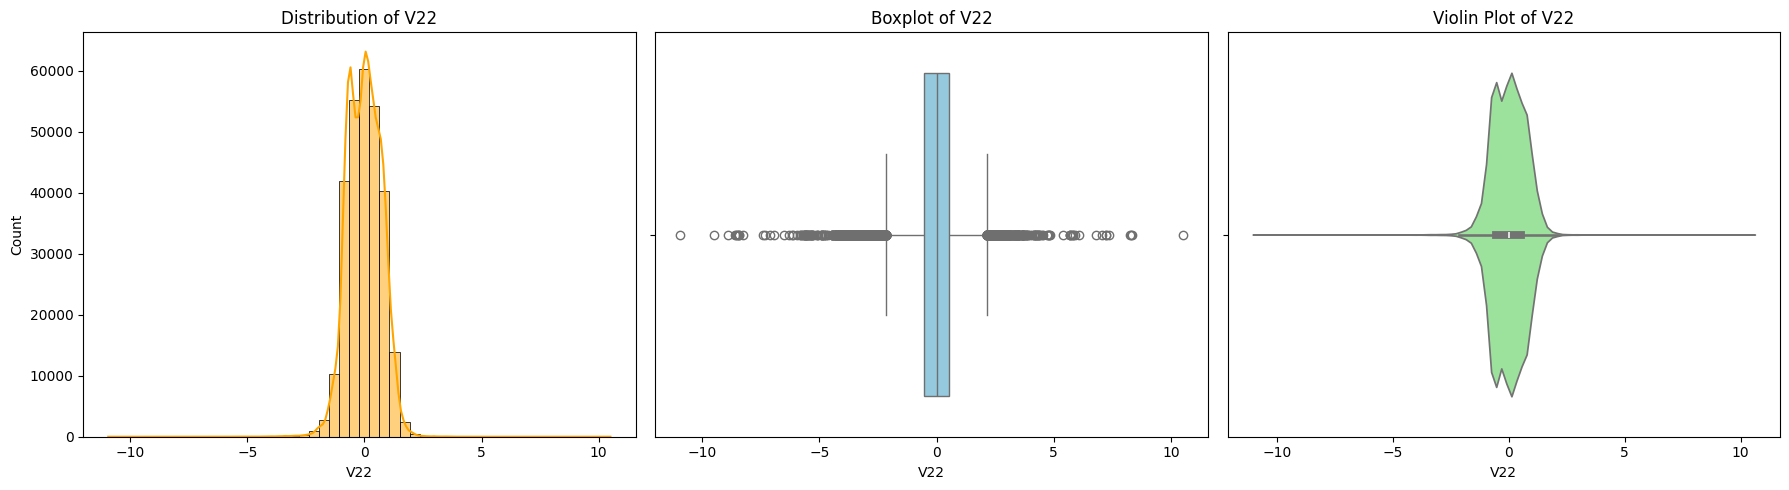

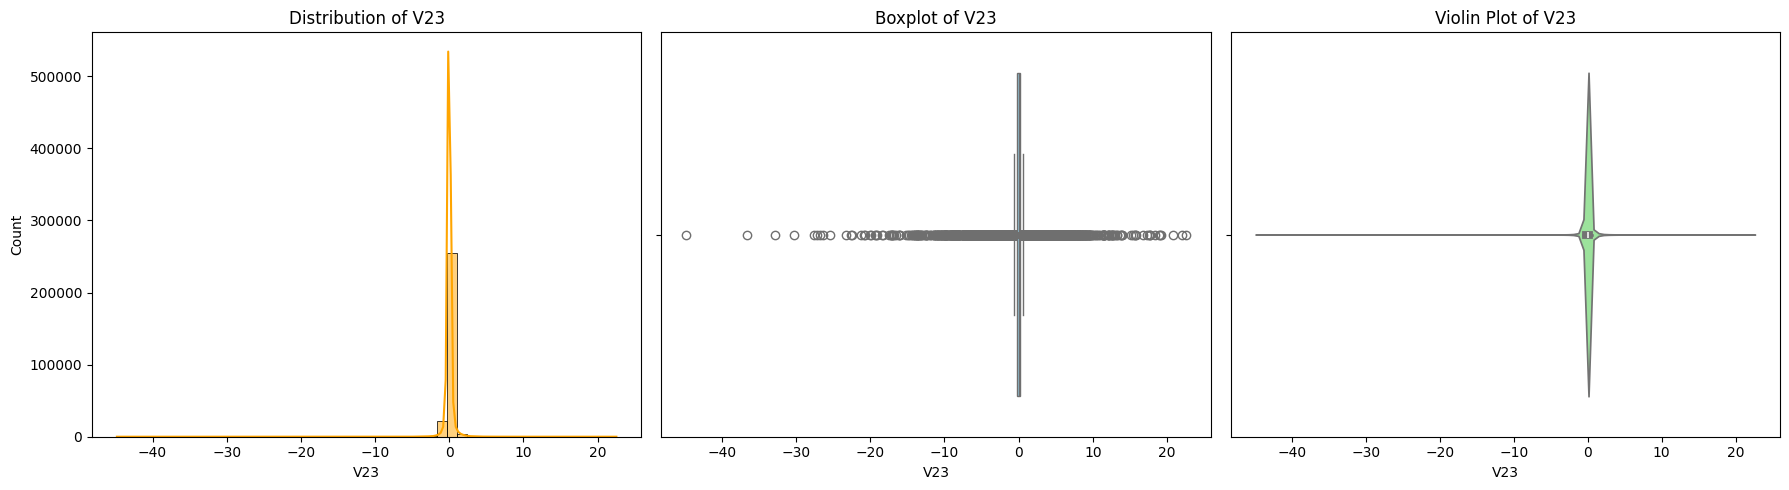

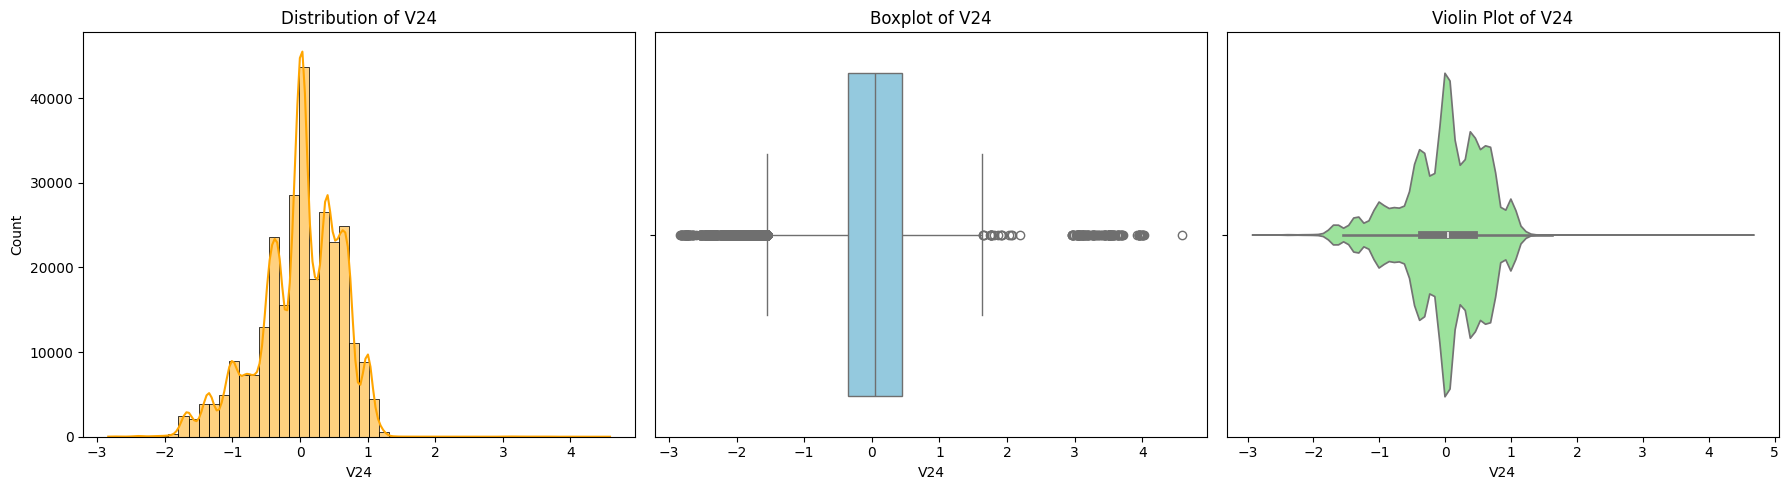

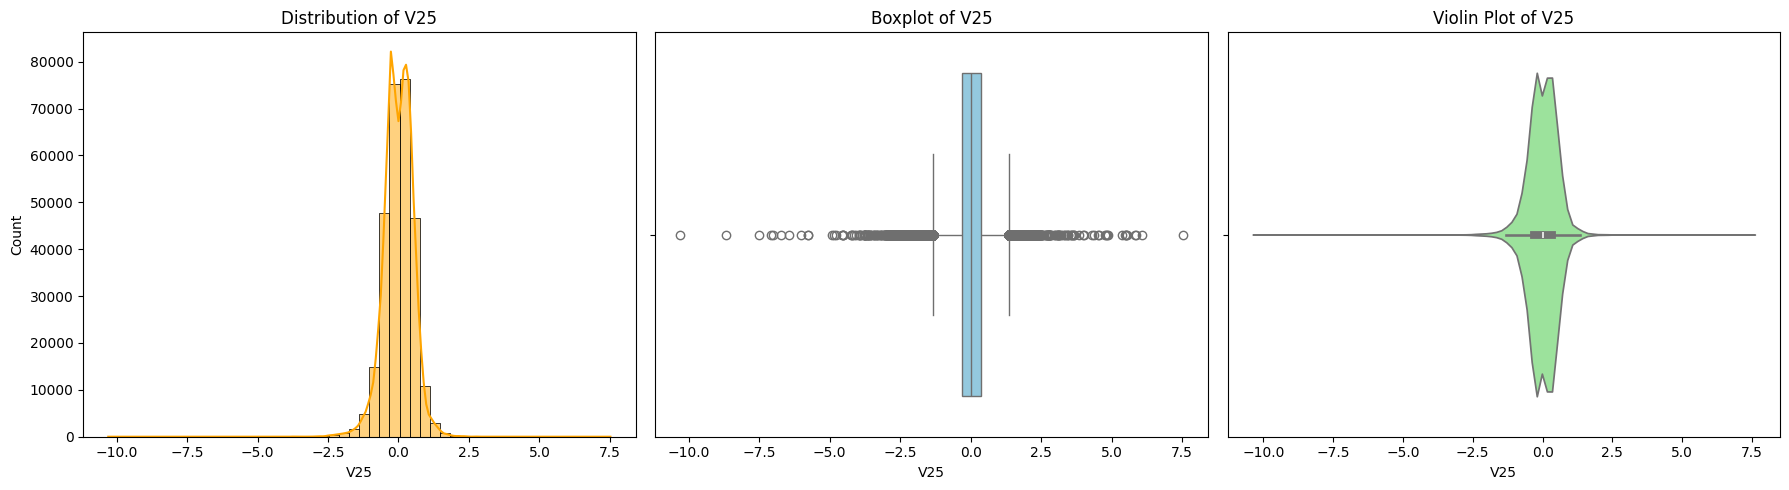

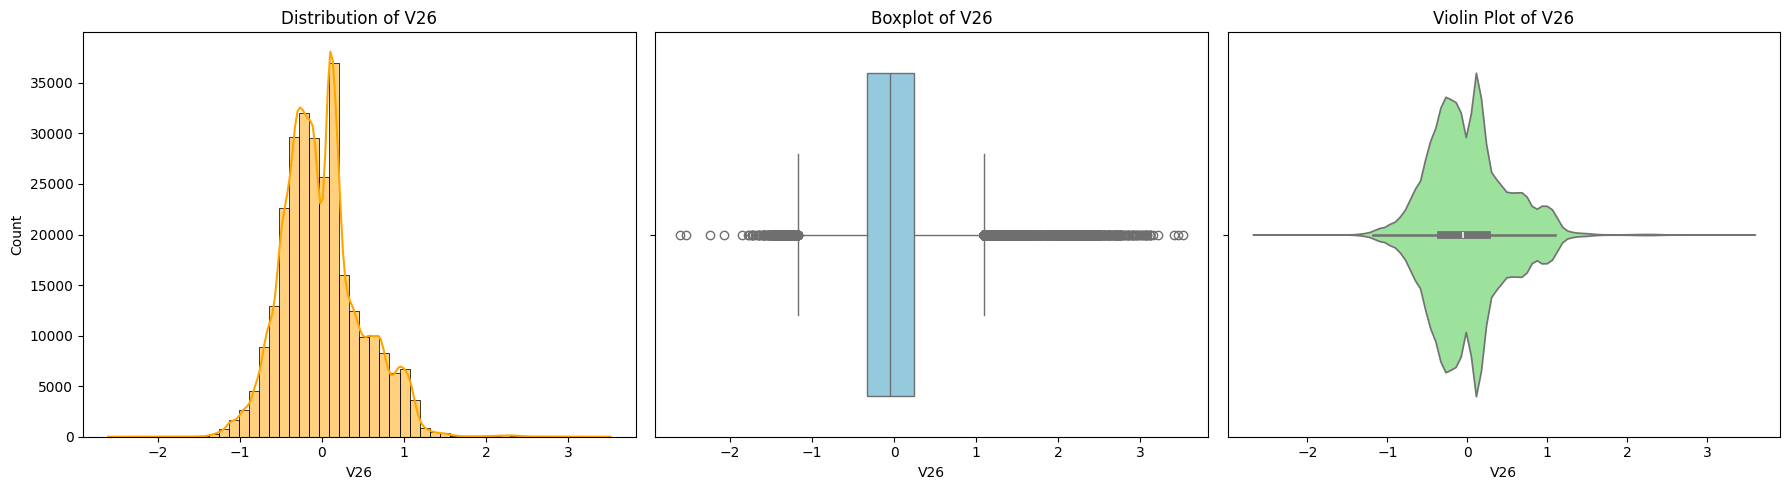

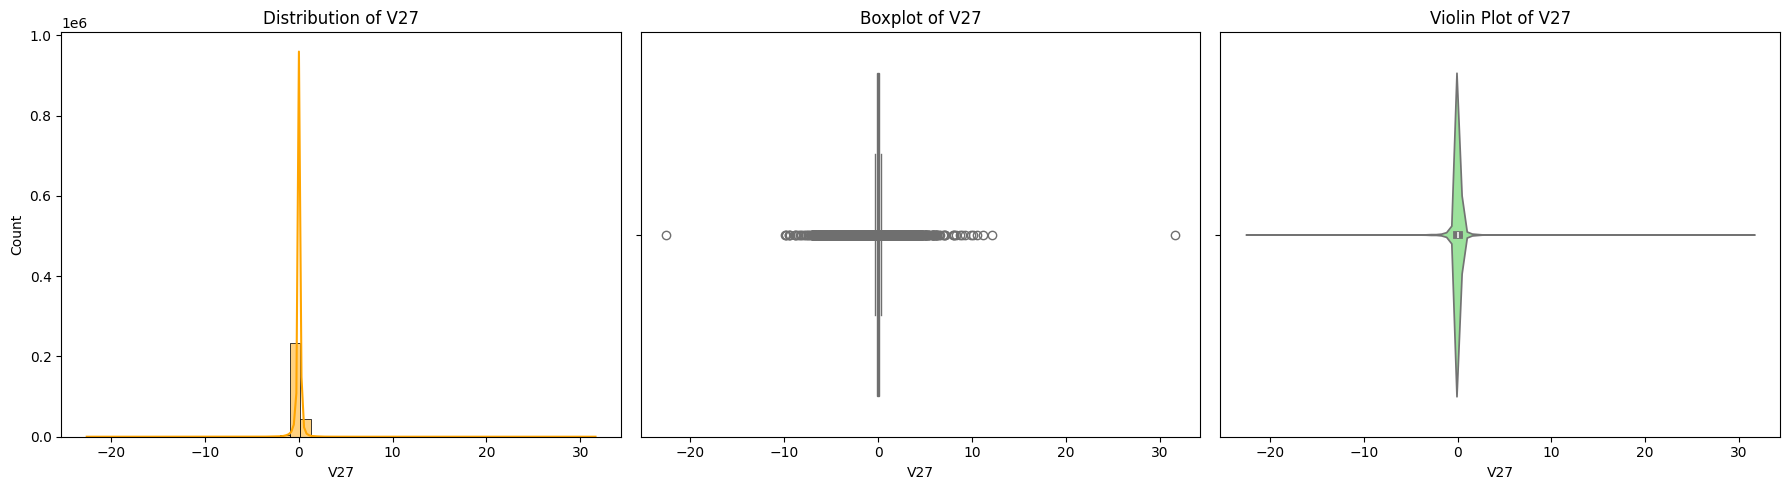

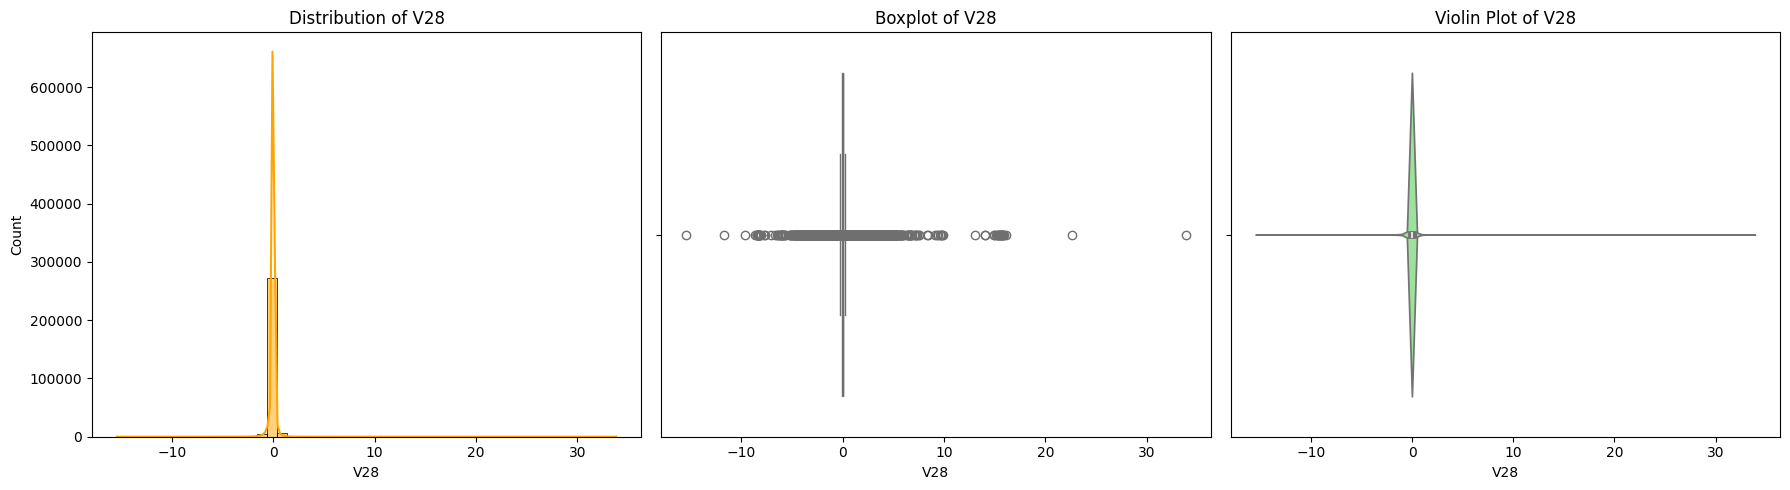

In [22]:
features = [f"V{i}" for i in range(1,29)]

for col in features:
    analyze_feature(df, col)

In [23]:
df["Amount"].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

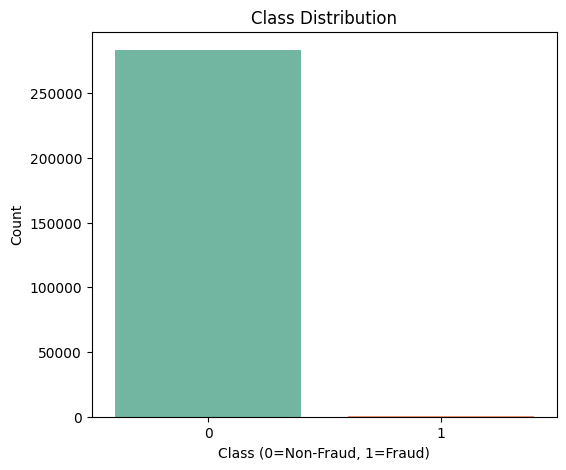

Fraud Percentage: 0.1667%


In [24]:
plt.figure(figsize=(6,5))
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class (0=Non-Fraud, 1=Fraud)")
plt.ylabel("Count")
plt.show()

fraud_percentage = df["Class"].mean() * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

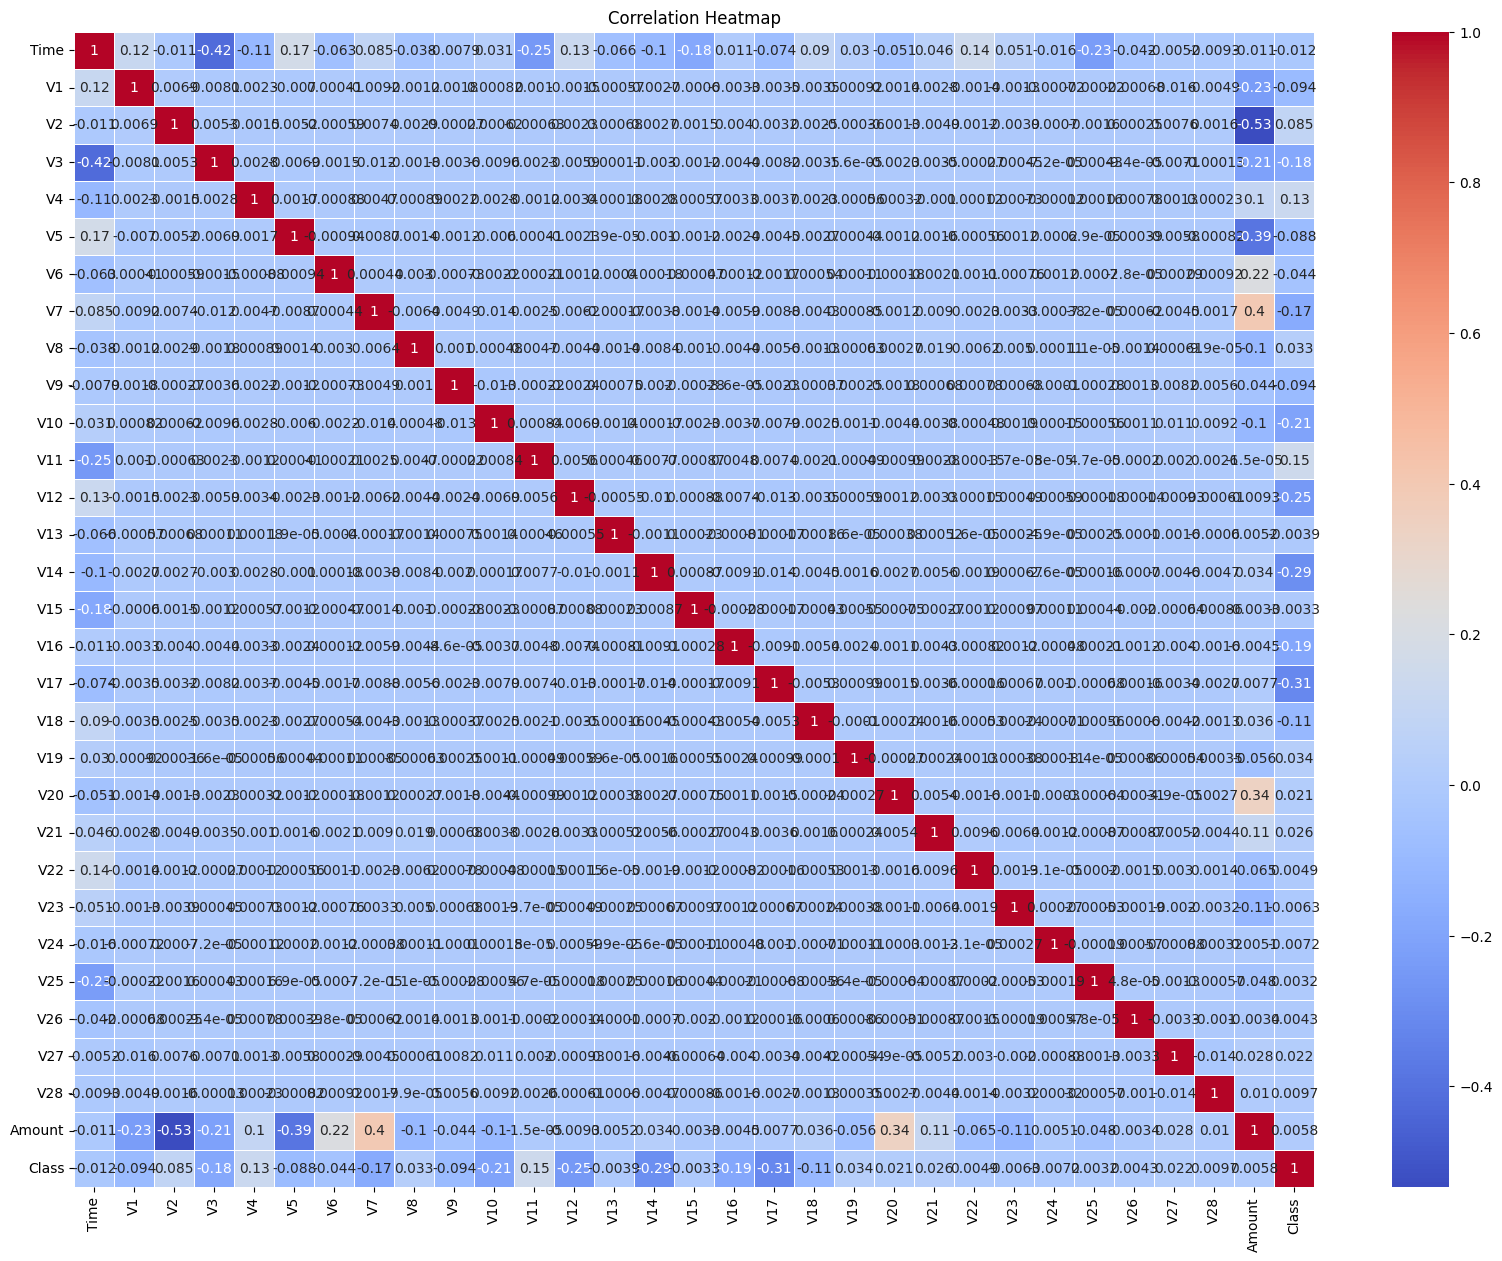

In [25]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

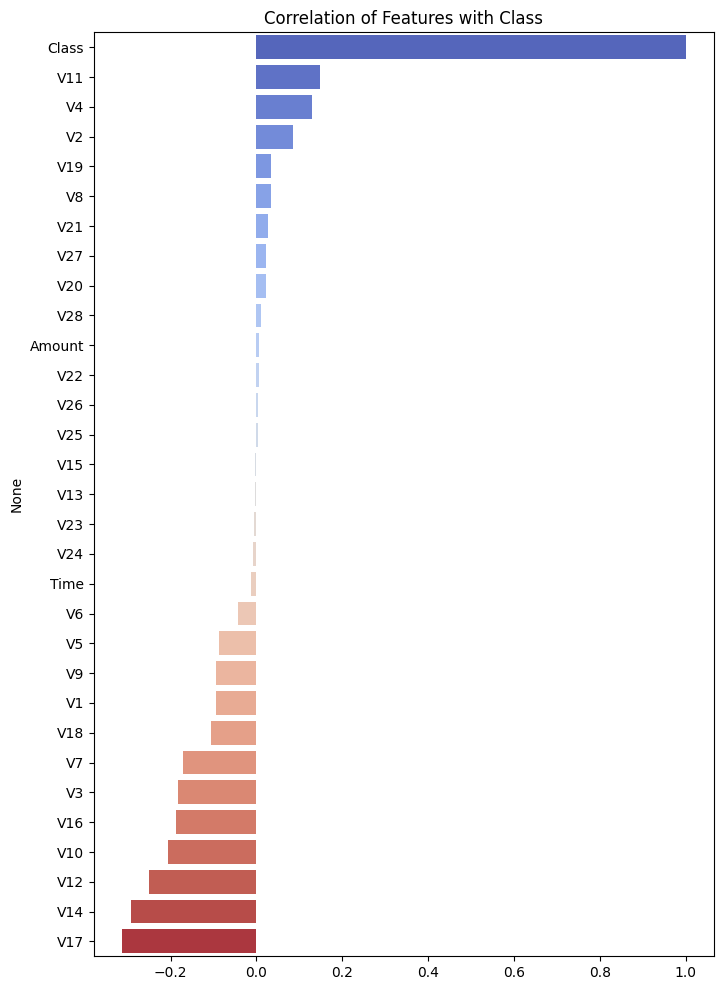

In [26]:
class_corr = corr["Class"].sort_values(ascending=False)

plt.figure(figsize=(8,12))
sns.barplot(x=class_corr.values, y=class_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Class")
plt.show()

In [27]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [30]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())

Before SMOTE: Class
0    226602
1       378
Name: count, dtype: int64
After SMOTE: Class
0    226602
1    226602
Name: count, dtype: int64


In [31]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [32]:
log_reg.fit(X_res, y_res)

LogisticRegression(max_iter=1000, random_state=42)

In [33]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746

ROC-AUC Score: 0.9626184886409772


In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [36]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.9694220104815354


In [37]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.79      0.76        95

    accuracy                           1.00     56746
   macro avg       0.86      0.89      0.88     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.9699794401362358


In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [41]:
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=30, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1, random_state=42
)

In [42]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [43]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6}
Best Score: 0.9836955935467864


In [44]:
best_xgb = XGBClassifier(
    subsample=0.6,
    reg_lambda=1.5,
    reg_alpha=0.01,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    gamma=0.1,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

In [46]:
print("XGBoost (Tuned) Classification Report:\n")
print(classification_report(y_test, y_pred))

XGBoost (Tuned) Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [47]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9757581275566278


                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.999524   0.972222  0.736842  0.838323  0.975758
1        Random Forest  0.999489   0.912500  0.768421  0.834286  0.969422
2              XGBoost  0.999154   0.728155  0.789474  0.757576  0.969979
3        XGBoost Tuned  0.999524   0.972222  0.736842  0.838323  0.975758


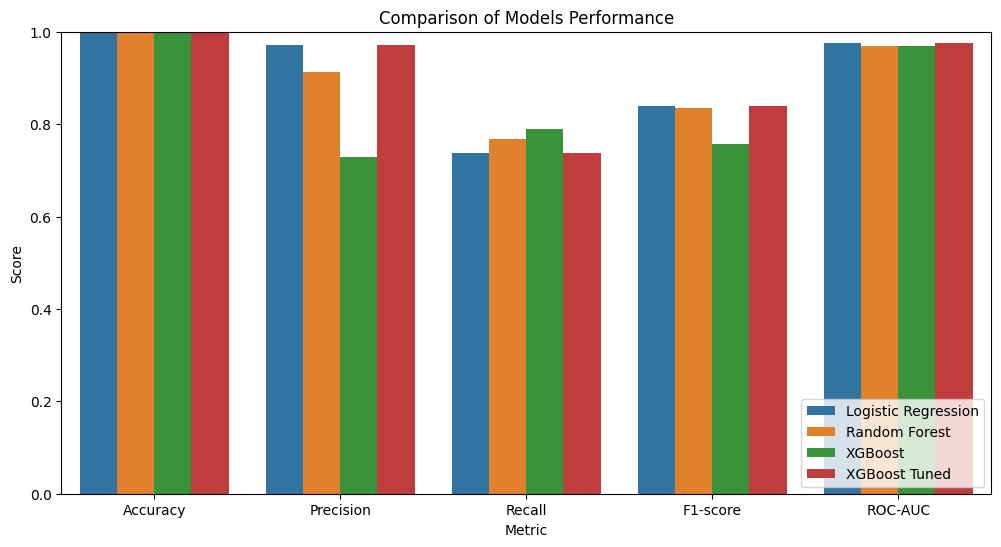

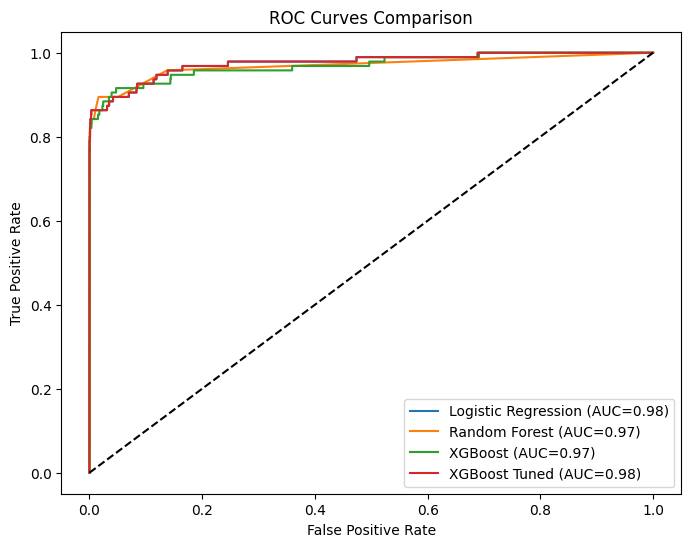

In [48]:
models = {
    "Logistic Regression": (y_test, y_pred, y_prob),
    "Random Forest": (y_test, y_pred_rf, y_prob_rf),
    "XGBoost": (y_test, y_pred_xgb, y_prob_xgb),
    "XGBoost Tuned": (y_test, y_pred, y_prob)
}

results = []

for name, (yt, yp, ypr) in models.items():
    report = classification_report(yt, yp, output_dict=True)
    auc = roc_auc_score(yt, ypr)
    acc = accuracy_score(yt, yp)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"],
        "ROC-AUC": auc
    })

df_results = pd.DataFrame(results)
print(df_results)

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

plt.figure(figsize=(12, 6))
df_melted = df_results.melt(id_vars="Model", value_vars=metrics,
                            var_name="Metric", value_name="Score")
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")
plt.title("Comparison of Models Performance")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# -------------------------------
# 3 . ROC Curves
# -------------------------------
plt.figure(figsize=(8, 6))

for name, (yt, yp, ypr) in models.items():
    fpr, tpr, _ = roc_curve(yt, ypr)
    auc = roc_auc_score(yt, ypr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

In [49]:
import joblib
joblib.dump(best_xgb, "best_model.pkl")
print("✅ Best model saved as best_model.pkl")

✅ Best model saved as best_model.pkl


In [58]:
import joblib

# Path to your Drive folder (change folder name if needed)
save_path = "/content/drive/MyDrive/ML_Things/best_model.pkl"

# Save model
joblib.dump(best_xgb, save_path)
print(f"✅ Model saved to {save_path}")


✅ Model saved to /content/drive/MyDrive/ML_Things/best_model.pkl


In [50]:
print("✅ Done")

✅ Done


In [51]:
!pip install shap -q

In [56]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

shap.initjs()

feature_names = df.drop("Class", axis=1).columns.tolist()
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)
background = shap.sample(X_train_df, nsamples=100, random_state=42)

# ✅ Extract raw booster
booster = best_xgb.get_booster()

# ✅ Fix the XGBoost base_score parsing issue
learner_model_param = booster.attr("learner_model_param")
if learner_model_param and "base_score" in learner_model_param:
    # replace string list formatting like "[1.6653449E-3]" → "1.6653449E-3"
    import re
    fixed = re.sub(r"\[([^\]]+)\]", r"\1", learner_model_param)
    booster.set_attr(learner_model_param=fixed)

# ✅ Now SHAP will work fine
explainer = shap.TreeExplainer(booster, data=background)

# Example explanation
fraud_indices = np.where(np.array(y_test) == 1)[0]
idx = fraud_indices[0] if len(fraud_indices) > 0 else np.argmax(best_xgb.predict_proba(X_test)[:,1])
instance = X_test_df.iloc[[idx]]

shap_values = explainer.shap_values(instance)
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value,
                                      data=instance.values[0],
                                      feature_names=feature_names),
                     max_display=10)
""

ValueError: could not convert string to float: '[1.6653449E-3]'

In [57]:
import shap
import xgboost as xgb
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

shap.initjs()

feature_names = df.drop("Class", axis=1).columns.tolist()
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)
background = shap.sample(X_train_df, nsamples=100, random_state=42)

# --- Convert to raw Booster ---
booster = best_xgb.get_booster()

# ✅ FIX base_score issue by rewriting model JSON
model_json = booster.get_dump(dump_format="json")
fixed_model_json = []
for tree_json in model_json:
    tree = json.loads(tree_json)
    fixed_model_json.append(json.dumps(tree))
fixed_model_str = "[" + ",".join(fixed_model_json) + "]"

# ✅ Create new Booster from fixed JSON
fixed_booster = xgb.Booster()
fixed_booster.load_model(bytearray(fixed_model_str, "utf-8"))

# ✅ Use SHAP TreeExplainer safely
explainer = shap.TreeExplainer(fixed_booster, data=background)

# --- Pick a test sample to explain ---
fraud_indices = np.where(np.array(y_test) == 1)[0]
idx = fraud_indices[0] if len(fraud_indices) > 0 else np.argmax(best_xgb.predict_proba(X_test)[:, 1])
instance = X_test_df.iloc[[idx]]

# --- Compute SHAP values ---
shap_values = explainer.shap_values(instance)

# --- Local Explanation ---
shap.plots.waterfall(
    shap.Explanation(values=shap_values[0],
                     base_values=explainer.expected_value,
                     data=instance.values[0],
                     feature_names=feature_names),
    max_display=10
)


XGBoostError: [04:20:17] /workspace/src/c_api/c_api.cc:1515: Invalid model format. Expecting UBJSON (`ubj`) or JSON (`json`), got ``
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7e30b66bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x1c915b) [0x7e30b65c915b]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGBoosterLoadModelFromBuffer+0x5c) [0x7e30b65c924c]
  [bt] (3) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7e30fdf8ce2e]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7e30fdf89493]
  [bt] (5) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x98c1) [0x7e30ff1b28c1]
  [bt] (6) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x8ffe) [0x7e30ff1b1ffe]
  [bt] (7) /usr/bin/python3(_PyObject_MakeTpCall+0x2fb) [0x53f5db]
  [bt] (8) /usr/bin/python3(_PyEval_EvalFrameDefault+0x701) [0x54a2e1]

